# Acquisition des Données

In [59]:
import os
os.chdir('C:/Users/libas/Desktop/M2 Data Mining/7-Text Mining')
import Functions
import pandas as pd
import numpy as np
import json
import gensim
from gensim.utils import simple_preprocess

%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import  Word2Vec
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm 

import datashader 
import bokeh 
import holoviews 
import colorcet

import umap
import pyLDAvis
import pyLDAvis.gensim_models

In [3]:
import spacy
nlp = spacy.load('fr_core_news_lg')

In [ ]:
data1 = []
with open('data/dblp-ref-1.json') as f:
    for line in f:
        data1.append(json.loads(line))

In [ ]:
data1[2999].keys()

In [ ]:
indices = [x for x in range(50000)]

data = []
for index in indices:
    data.append(data1[index])
    
df = pd.DataFrame.from_dict(data, orient='columns')
dblp = df[df.columns.drop(['n_citation', 'references','venue'])]
#dblp

In [ ]:
#exportation de 3fichiers en CSV du dataframe déja créée contenant 200k - 100k et 15k
import xlsxwriter
writer = pd.ExcelWriter('données_dbpl_50k.xlsx', engine='xlsxwriter')
dblp.to_excel(writer, sheet_name='docs', index=False)
writer.save()

# Chargement des Données

In [4]:
dblp_data = pd.read_excel('TD/données_dbpl_15k.xlsx')
dblp_data.head(5)

,abstract,authors,title,year,id
0,Based on biological control strategy in pest m...,"['Guoping Pang', 'Lansun Chen']",Dynamic analysis of a pest-epidemic model with...,2008,4aa69add-3978-480b-a1c0-d99a83d7e324
1,Abstract#R##N##R##N#Regression testing is an i...,"['Anneliese von Mayrhauser', 'Ning Zhang']",Automated regression testing using DBT and Sleuth,1999,4aa69b49-9bfc-49c3-81a7-7af5c215ca0e
2,Mobile applications are software packages that...,"['Zheng Yan', 'Peng Zhang', 'Robert H. Deng']",TruBeRepec: a trust-behavior-based reputation ...,2012,4aa69de5-c819-482e-a808-2b3f8b829008
3,We propose a method that allows opportunistic ...,"['Jarkko Kaleva', 'Petri Komulainen', 'Markku ...",Zero-forcing spatial interweave with greedy sc...,2011,4aa6a255-c72c-4ccf-b1b8-c048ba39255b
4,This article studies the power allocation (PA)...,"['Yingnan Zhang', 'Qiao Wang']",Optimal power control of parallel orthogonalfr...,2011,4aa6bae5-bbd9-46a1-944a-18ed700b72d5


# Preprocessing

In [5]:
#récupérer sous forme de liste
corpus = dblp_data['abstract'].tolist()
corpus[1]

'Abstract#R##N##R##N#Regression testing is an important activity in software maintenance. Current regression testing strategies can be categorized into two groups: ‘retest all’ and ‘selective regression’ testing. Each of these two groups encompasses a variety of strategies. In industrial practice, regression testing procedures vary widely. Sometimes, several regression testing techniques are used in combination. Technique selection is also influenced by the expected quality of the system to be tested. Such variations in regression testing strategies and techniques mandate flexibility for a regression testing tool. This paper presents regression testing support for Sleuth, a test generation tool based on domain-based testing. We explain the rules for building regression tests for a variety of possible regression testing strategies from retest all strategies to selective regression testing strategies. Copyright © 1999 John Wiley & Sons, Ltd.'

In [ ]:
#Mis en minuscule
corpus = [str(doc).lower() for doc in corpus]

In [ ]:
#retrait des ponctuations
import string
ponctuations = list(string.punctuation)
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
print(corpus[1])

In [41]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 2),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 4),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 3),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 3),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1)]

In [42]:
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize  

# word_tokens = [word_tokenize(doc) for doc in corpus]
stopwords = stopwords.words('english')
# corpus = [w for w in word_tokens if not w in stop_words] 
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Construction d'un index sur les mots du corpus

#####  Représentation Matrice Documents-Termes

In [ ]:
#Pas besoin d'utiliser le paramètre lowercase=True car deja mis en minuscule
#les parametres stop_words, max_def et min_def suppriment respectivement les mots-outils, mots trop rares et trop fréquents 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords, max_df=0.95, min_df=2, max_features=None)
X_TF= vectorizer.fit_transform(corpus)

In [ ]:
#vectorizer.vocabulary_
#print(len(vectorizer.vocabulary_))

#####  Représentation TFxIDF
Cette mesure qui prend en compte la rareté d'un mot dans le corpus :
$ tf_{t,d} \times idf_{t} $
avec $tf_{t,d}$ le nombre d'occurrences de $t$ dans $d$
et $idf_{t} = \log \frac{N}{df_t}$ ($N$ est le nombre total de documents ; $df_t$ le nombre de documents où le terme apparaît)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, max_df=0.95, min_df=2, max_features=None)
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
#features_dblp = tfidf_vectorizer.get_feature_names()
features_dblp = vectorizer.get_feature_names()

In [ ]:
print(corpus[2])

In [ ]:
import Functions
Functions.top_feats_in_doc(X_TF, features_dblp, 2, top_n=10)

In [ ]:
D = X_TF.toarray()
n_docs, n_terms = D.shape
tf_sum = np.sum(D, axis=0)
tff = Functions.top_feats(tf_sum, features_dblp, top_n= 10)
tff

In [ ]:
#Affichage des mots les plus fréquents
top_f = tff.feature
top_v = tff.score
df = pd.DataFrame({'mot':top_f, 'TF':top_v})
df.plot.bar(x='mot', y='TF', rot=90, title ="Mot les plus fréquents", color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

# Création d'un moteur de recherche

Pour créer son propre moteur de recherche maison, la procédure revient à :

* construire un pseudo-document correspondant à la requête, càd un vecteur-requête dans le même espace que les documents
* comparer le vecteur-requête avec tous les vecteurs documents (càd les lignes de la matrice), par ex. avec une mesure cosinus
* trier le vecteur des scores qui en résultent
* afficher les documents qui ont obtenu les meilleurs scores

In [ ]:
query = ['data', 'visualisation', 'model', 'real']

#construction d'un pseudo-document correspondant a la requete
#index permet de trouver le numéro correspondant aux mots dans le vocabulaire
indexes = [features_dblp.index(q) for q in query if q in features_dblp]
indexes
#On construit un vecteur de la même taille que le vocabulaire. 
#Il est initialisé à zéro, puis on y met la valeur 1 pour les termes de la requête.
query_vec = np.zeros(n_terms)
query_vec[indexes] = 1

In [ ]:
#On verifie bien que le vecteur requête contient bien 4 éléments non nuls
sum(query_vec)

In [ ]:
#Calculons le consinus entre le vecteur d'un document et celui de la requete
Functions.cosinus(D[12639, :], query_vec)

In [ ]:
#resultats des documents avec les cosinus les plus elevés vis-a-vis de notre vecteur-requete
result = Functions.search(query_vec, D, n_docs)
result[0:10]

In [ ]:
#les doc ayant les 10 meilleurs scores 
nb_top_docs = 10
top_docs = [r for (r,v) in result[0:nb_top_docs]]
print(top_docs)

In [ ]:
# affichage des documents qui ont obtenu les 10 meilleurs scores.
for i, td in zip(range(nb_top_docs), top_docs):
    print("%s (%s): %s" % (i+1, td, corpus[td]))

### MODEL MOTEUR DE RECHERCHE

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(stop_words=stopwords, max_df=0.95, min_df=2, max_features=None)
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, max_df=0.95, min_df=2, max_features=None)

X_TF= vectorizer.fit_transform(corpus)
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

def moteur_de_recherche(X,query,nb_top_docs):
    
    D = X.toarray()
    n_docs, n_terms = D.shape
    tf_sum = np.sum(D, axis=0)
    tff = Functions.top_feats(tf_sum, features_dblp,top_n = 10)

    indexes = [features_dblp.index(q) for q in query if q in features_dblp]
    query_vec = np.zeros(n_terms)
    query_vec[indexes] = 1
    result = Functions.search(query_vec, D, n_docs)
    top_docs = [r for (r,v) in result[0:nb_top_docs]]
    for i, td in zip(range(nb_top_docs), top_docs):
        print("%s (%s): %s" % (i+1, td, corpus[td]))

In [ ]:
#la requete doit contenir les keywords
query = ['paper', 'system', 'results']
#le nombre de docs à la sortie avec les meilleurs score
nb_top_docs = 5
#Choix entre TF ou TF-IDF
X = X_tfidf
moteur_de_recherche(X,query,nb_top_docs)

In [ ]:
query = ['algorithm', 'method', 'networks', 'software', 'image']
nb_top_docs = 3
#Choix entre TF ou TF-IDF
X = X_TF
moteur_de_recherche(X,query,nb_top_docs)

# Regroupement par cluster

### Espace de plongement : approche naive

Cette approche consiste à calculer des représentations vectorielles de documents comme le centre d'inertie des mots qui le composent.

In [ ]:
import Functions

In [ ]:
#On récupère la taille des plongements car elle constitue la dimension de l'espace dans lequel on va plonger les documents.
dim = len(nlp.vocab.vectors[nlp.vocab.strings["paper"]])
X = X_TF

#Puis on calcule la représentation pour chaque document du corpus. On en profite pour sauvegarder une liste avec 
#la taille des documents (ici, le nombre de mots ayant un vecteur associé dans le plongement).
nbw_docs = []
i = 0
doc_vec = np.zeros(shape=(n_docs,dim))
id_docs_nonvides = []
for d in vectorizer.inverse_transform(D):
    nbw, r = Functions.centre(d,dim)
    doc_vec[i] = r.reshape((1,dim))
    nbw_docs.append(nbw)
    i += 1

In [ ]:
doc_vec[0:6]

In [ ]:
#On sauvegarde l'information pour la partie visualisation
col_p = np.array(nbw_docs).reshape(n_docs,1)
col_ids = np.arange(1, n_docs+1).reshape(n_docs,1)
data_to_save = np.hstack([doc_vec, col_p, col_ids])
np.savetxt('vec_doc_naive.csv', data_to_save, delimiter='\t')

### Espace de plongement : Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# on rajoute une taille minimale dès à présent
min_docs = 5

tagged_docs = []
nbw_docs = []
for i, list_tokens in enumerate(vectorizer.inverse_transform(D)):
    nbw = len(list_tokens)
    nbw_docs.append(nbw)
    if nbw > min_docs:        
        tagged_docs.append(TaggedDocument(words=list_tokens, tags=[str(i+1)]))

In [ ]:
dim_d2v = 10

#model_doc2vec = Doc2Vec(tagged_docs, vector_size=dim_d2v, window = 3, iter = 1000)
model_doc2vec = Doc2Vec(tagged_docs, vector_size=dim_d2v, window = 3)
model_doc2vec.train(tagged_docs, total_examples = len(tagged_docs), epochs = 1000)

In [ ]:
set1 = set(features_dblp)
set2 = set(model_doc2vec.wv.index_to_key)
set1.difference(set2)

In [ ]:
from nltk.tokenize import word_tokenize

test_doc = word_tokenize("Data Science, model is all paper algorithm".lower())
test_doc_vector = model_doc2vec.infer_vector(test_doc)
res = model_doc2vec.dv.most_similar(positive = [test_doc_vector])
print(res)

In [ ]:
for i, s in res:
    ind_doc = int(i)
    print("%s (%s): %s" % (i, s, corpus[ind_doc-1]))

In [ ]:
print(len(model_doc2vec.dv))
type(model_doc2vec.dv)

In [ ]:
#set_tags = list(model_doc2vec.docvecs.doctags)
set_tags = list([t.tags[0] for t in tagged_docs])
nb_docs_small = len(set_tags)
print(nb_docs_small)

In [ ]:
#On récupère le tableau des plongements pour le sauvegarder.
doc_vec_doc2vec = np.zeros(shape=(nb_docs_small, dim_d2v))

i = 0
for t in set_tags:    
    doc_vec_doc2vec[i] = model_doc2vec.dv[t]
    i += 1

doc_vec_doc2vec.shape

In [ ]:
doc_ids_small = [int(t) for t in set_tags]
nbw_docs_small = [nbw_docs[i-1] for i in doc_ids_small]

col_p = np.array(nbw_docs_small).reshape(nb_docs_small,1)
col_ids = np.array(doc_ids_small).reshape(nb_docs_small,1)
data_to_save = np.hstack([doc_vec_doc2vec, col_p, col_ids])
np.savetxt('vec_doc_doc2vec.csv', data_to_save, delimiter='\t')

## Clustering de documents

In [ ]:
# L'objectif est d'utiliser un algorithme simple de clustering (ici, k-means). Bien sûr, l'intérêt 
# d'utiliser un espace vectoriel est de pouvoir utiliser de nombreux autres algorithmes, comme des modèles de mélange, etc.

In [ ]:
doc_vec.shape

In [ ]:
from sklearn.cluster import KMeans

k = 10

km_10 = KMeans(n_clusters=k, random_state=0).fit(doc_vec)

In [ ]:
import pandas
pandas.Series(km_10.labels_).value_counts()

In [ ]:
col_p = np.array(nbw_docs).reshape(n_docs,1)
col_ids = np.arange(1, n_docs+1).reshape(n_docs,1)
clu_lab = np.array(km_10.labels_).reshape(n_docs,1)
data_to_save = np.hstack([doc_vec, col_p, col_ids, clu_lab])
np.savetxt('vec_doc_naive_cl10.csv', data_to_save, delimiter='\t')

In [ ]:
# Idem avec la représentation obtenue à l'aide de doc2vec.

In [ ]:
km_10_doc2vec = KMeans(n_clusters=10, random_state=0).fit(doc_vec_doc2vec)

In [ ]:
doc_ids_small = [int(t) for t in set_tags]
nbw_docs_small = [nbw_docs[i-1] for i in doc_ids_small]
clu_lab_small = np.array(km_10_doc2vec.labels_).reshape(nb_docs_small,1)

col_p = np.array(nbw_docs_small).reshape(nb_docs_small,1)
col_ids = np.array(doc_ids_small).reshape(nb_docs_small,1)
data_to_save = np.hstack([doc_vec_doc2vec, col_p, col_ids, clu_lab_small])
np.savetxt('vec_doc_doc2vec_clu10.csv', data_to_save, delimiter='\t')

### Visualisation des différentes approches précédentes à partir des données sauvergardées

#### Visualisation approche naive

In [63]:
data = np.loadtxt('vec_doc_naive.csv', delimiter='\t')

In [64]:
dim = data.shape[1]-2
doc_vec = data[:, :dim]
mapper = umap.UMAP().fit(doc_vec)

In [66]:
#On peut accéder aux coordonnées du plongement, avant de le visualiser.
mapper.embedding_.shape

(15000, 2)

<AxesSubplot:>

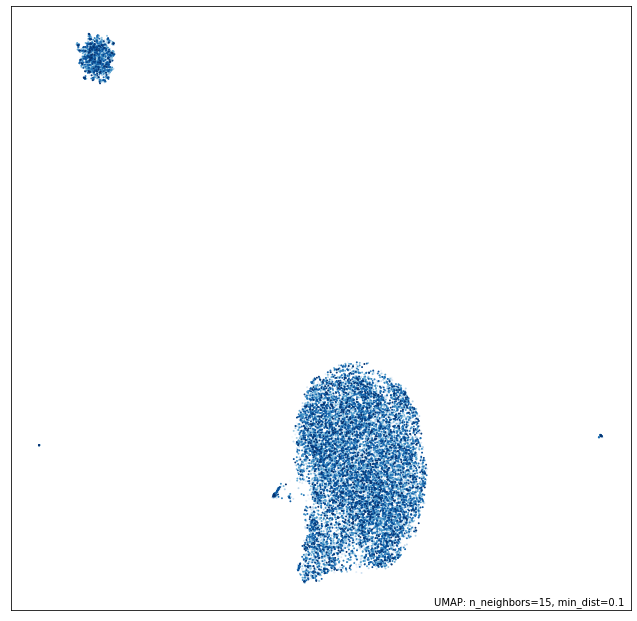

In [71]:
#umap.plot.points(mapper)
umap.plot.points(mapper, values=np.arange(ndocs))

2022-02-22 01:56:28,515 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

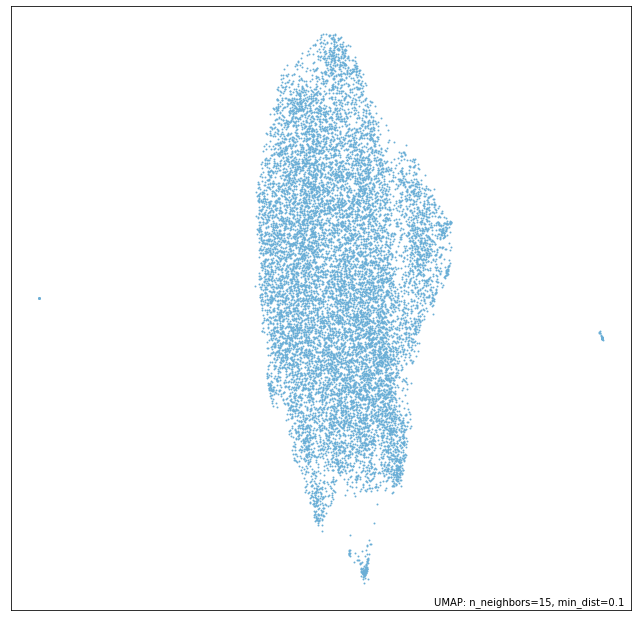

In [74]:
# On peut raffiner en n'affichant que les documents de plus de K mots, par exemple.
nb_words = data[:, dim]
min_words = 12

id_docs_light = np.where(nb_words > min_words)[0]

doc_vec_light = doc_vec[id_docs_light,:]
doc_vec_light.shape

mapper = umap.UMAP().fit(doc_vec_light)
umap.plot.points(mapper)

In [75]:
#On voudrait une visualisation plus interactive, avec le numéro des documents attribués à chaque point (attention, il faut décaler de 1).
labels_id = [i+1 for i in id_docs_light]
labels_id[0:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [76]:
hover_data = pd.DataFrame({'index':np.arange(len(id_docs_light)),
                           'label':labels_id})
mapper = umap.UMAP().fit(doc_vec_light)
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=2)
umap.plot.show(p)

In [78]:
#On peut raffiner, par ex. en rajoutant le texte correspondant aux points.
hover_data = pd.DataFrame({'index': np.arange(len(id_docs_light)),
                           'label': labels_id,
                           'text': [corpus[t] for t in id_docs_light]})
mapper = umap.UMAP().fit(doc_vec_light)
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=2)
umap.plot.show(p)

Affichage colorée des clusters

In [79]:
data = np.loadtxt('vec_doc_naive_cl10.csv', delimiter='\t')

dim = data.shape[1]-3
doc_vec = data[:, :dim]
nb_words = data[:, dim]
clu_ids = data[:, dim+2]

min_words = 4
id_docs_light = np.where(nb_words > min_words)[0]
labels_id_light = [i+1 for i in id_docs_light]
doc_vec_light = doc_vec[id_docs_light,:]
clu_ids_light = clu_ids[id_docs_light]

mapper = umap.UMAP(n_neighbors=3).fit(doc_vec_light)

In [81]:
hover_data = pd.DataFrame({'label': labels_id_light,
                           'text': [corpus[t] for t in id_docs_light]})
p = umap.plot.interactive(mapper, hover_data=hover_data, labels=clu_ids_light, point_size=2)
umap.plot.show(p)

#### Visualisation : approche doc2vec

In [83]:
data = np.loadtxt('vec_doc_doc2vec_clu10.csv', delimiter='\t')
dim = data.shape[1]-3 # les deux dernières colonnes sont utilisées pour autre chose
doc_vec = data[:, :dim]
id_docs = data[:, dim+1]
clu_ids = data[:, dim+2]

mapper = umap.UMAP(n_neighbors = 3, min_dist = 0.1).fit(doc_vec)

In [85]:
hover_data = pd.DataFrame({'label': id_docs,
                           'text': [corpus[int(t)-1] for t in id_docs]})
p = umap.plot.interactive(mapper, hover_data=hover_data, labels=clu_ids, point_size=2)
umap.plot.show(p)

# Visualisation du Corpus
##### Affichage des mots les plus employés; nuage de mots

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)
X = X.toarray()
features = vectorizer.get_feature_names()

(num_doc, num_f) = X.shape

In [ ]:
# les "labels" du nuage sont les mots
cloud_labels = features
# les poids correspondent à la somme des TF selon les lignes de la matrice
cloud_weights = np.sum(X, axis=0)
# on construit un dictionnaire qui associe chaque label (mot) au poids correspondant (TF total)
dictionary = dict(zip(cloud_labels, cloud_weights)) # zip "colle" le vecteur des labels au vecteur des poids
# on trie par ordre décroissant
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

In [ ]:
from wordcloud import WordCloud

limit = 50
fontcolor='#fafafa'
bgcolor = '#000000'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary) # cette fois, on donne au générateur le dictionnaire construit par nos soins   

In [ ]:
import random
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Nuage de mots des mots les plus fréquents pour les données extraites DBLP"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Etude des co-occurrences : à prendre en compte la taille du graphe 

In [ ]:
# Nous allons à présent étudier la co-occurrences de mots (sont-ils souvent employés ensemble ?).
# Pour commencer, on va réduire la taille du vocabulaire pour ne garder que les mots les plus employés.

t_freq = np.where(cloud_weights>20)
index = t_freq[0]
X_small = X[:,index]
features_small = np.array(features)[index]
print(X_small.shape)

(_,num_f_small) = X_small.shape

print("Nombre de colonnes = mots : " + str(num_f_small))

In [ ]:
np.array(features)[index][0:50]

In [ ]:
co_occ = np.matmul(X_small.transpose(), X_small)

In [ ]:
id_mot = np.where(features_small == "paper")[0][0]
scores_coocc = co_occ[id_mot,:]
dico_co_occ = dict(zip(features_small, scores_coocc))
mots_coocc = sorted(dico_co_occ.items(), key=lambda kv: kv[1], reverse=True)
print(mots_coocc[0:20])

In [ ]:
sources = []
targets = []
weights = []
for i in range(num_f_small):
    for j in range(num_f_small):
        if ((i != j) & (co_occ[i, j] > 20)):
                sources = sources + [features_small[i]]
                targets = targets + [features_small[j]]
                weights = weights + [float(co_occ[i, j])]
                # float tranforme la valeur de co-occurrence en un nombre réel
                # (nécessaire sous certains environnements)

In [ ]:
import pandas as pd
# on crée des séries de données au format "pandas"
sources = pd.Series(sources)
targets = pd.Series(targets)
weights = pd.Series(weights)

In [ ]:
# cf. https://pyvis.readthedocs.io/en/latest/tutorial.html#networkx-integration

from pyvis.network import Network

net = Network(height="400px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

# set the physics layout of the network
net.barnes_hut()

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, value=w)

neighbor_map = net.get_adj_list()

# add neighbor data to node hover data
for node in net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

net.show_buttons(filter_=['physics'])    
   
net.show("co-occurrences.html")

# Modélisation thématique

In [6]:
# Dans cette partie nous allons repartir du corpus initial avec d'autres méthodes de preprocessing et nous allons
# Utiliser la libraire Gensim
# on construit le corpus
data_words = list(Functions.sent_to_words(corpus))

In [ ]:
# cette cellule a servi à titre comparatif entre les deux corpus du Carnet de Notes et de DBLP pour les pré-traitements 
# with open(os.path.join("Notebooks/Frank Herbert - Children of Dune.txt")) as f:
#     lines = [line.strip() for line in f.readlines()]
# doc_set = lines
# type(doc_set)
# type(corpus)
# type(doc_set[654])
# type(corpus[47])

In [7]:
# nombre total de documents
ndocs = len(data_words)
print(ndocs)

15000


In [8]:
# on retire les mots-outils
data_words_nostops = Functions.remove_stopwords(data_words)

In [24]:
# création du dictionnaire
dico = corpora.Dictionary(data_words_nostops)

# ce qui permet par ex. de filtrer le vocabulaire
dico.filter_extremes(no_below=10)

# Create Corpus
texts = data_words_nostops

# matrice Term Document Frequency
corpus_words = [dico.doc2bow(text) for text in texts]

2022-02-22 01:03:46,265 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-02-22 01:03:47,035 : INFO : adding document #10000 to Dictionary(32581 unique tokens: ['asymptotically', 'based', 'behavior', 'behaviors', 'bifurcation']...)
2022-02-22 01:03:47,443 : INFO : built Dictionary(40194 unique tokens: ['asymptotically', 'based', 'behavior', 'behaviors', 'bifurcation']...) from 15000 documents (total 1185607 corpus positions)
2022-02-22 01:03:47,443 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(40194 unique tokens: ['asymptotically', 'based', 'behavior', 'behaviors', 'bifurcation']...) from 15000 documents (total 1185607 corpus positions)", 'datetime': '2022-02-22T01:03:47.443260', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}
2022-02-22 01:03:47,487 : INFO : discarding 32553 tokens: [('doubling', 7), ('eradication', 3), ('floquet', 4), ('in

In [25]:
len(corpus_words)

15000

##### Apprentissage du Model proprement dit : à l'aide de la libraire Gensim

In [13]:
# thanks to: https://miningthedetails.com/blog/python/lda/GensimLDA/

#definissons d'abord le nombre de thématiques souhaitées
ntopics = 20
from gensim.models.ldamodel import LdaModel

generate_lda = True
#generate_lda = False

# generate LDA model
import logging

if generate_lda:
    print("generate new LDA model")
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    ldamodel = LdaModel(corpus, num_topics=ntopics, id2word = dico,
                                           passes=100, random_state=100, per_word_topics=True)
    print(ldamodel)

2022-02-22 00:36:31,874 : INFO : using symmetric alpha at 0.05
2022-02-22 00:36:31,877 : INFO : using symmetric eta at 0.05
2022-02-22 00:36:31,882 : INFO : using serial LDA version on this node
2022-02-22 00:36:31,915 : INFO : running online (multi-pass) LDA training, 20 topics, 100 passes over the supplied corpus of 15000 documents, updating model once every 2000 documents, evaluating perplexity every 15000 documents, iterating 50x with a convergence threshold of 0.001000
2022-02-22 00:36:31,921 : INFO : PROGRESS: pass 0, at document #2000/15000


generate new LDA model


2022-02-22 00:36:35,515 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:36:35,557 : INFO : topic #17 (0.050): 0.009*"results" + 0.008*"paper" + 0.008*"system" + 0.007*"based" + 0.006*"algorithm" + 0.006*"model" + 0.005*"using" + 0.005*"approach" + 0.005*"used" + 0.005*"new"
2022-02-22 00:36:35,560 : INFO : topic #5 (0.050): 0.009*"paper" + 0.008*"based" + 0.007*"process" + 0.007*"proposed" + 0.007*"method" + 0.005*"results" + 0.005*"software" + 0.005*"used" + 0.005*"scheme" + 0.004*"system"
2022-02-22 00:36:35,562 : INFO : topic #10 (0.050): 0.011*"paper" + 0.009*"method" + 0.007*"data" + 0.007*"proposed" + 0.006*"model" + 0.006*"based" + 0.006*"results" + 0.005*"algorithm" + 0.005*"problem" + 0.004*"analysis"
2022-02-22 00:36:35,565 : INFO : topic #16 (0.050): 0.012*"time" + 0.010*"system" + 0.008*"paper" + 0.006*"model" + 0.006*"using" + 0.006*"results" + 0.006*"data" + 0.004*"approach" + 0.004*"two" + 0.004*"method"
2022-02-22 00:36:35,569 

2022-02-22 00:36:55,765 : INFO : topic #8 (0.050): 0.011*"detection" + 0.009*"data" + 0.008*"learning" + 0.007*"based" + 0.007*"results" + 0.006*"used" + 0.005*"two" + 0.005*"performance" + 0.005*"different" + 0.004*"paper"
2022-02-22 00:36:55,769 : INFO : topic #0 (0.050): 0.025*"data" + 0.012*"system" + 0.011*"information" + 0.009*"based" + 0.009*"paper" + 0.009*"systems" + 0.008*"applications" + 0.007*"web" + 0.007*"design" + 0.007*"approach"
2022-02-22 00:36:55,772 : INFO : topic #3 (0.050): 0.031*"method" + 0.012*"methods" + 0.009*"based" + 0.008*"equations" + 0.007*"using" + 0.006*"numerical" + 0.006*"paper" + 0.006*"model" + 0.005*"proposed" + 0.005*"results"
2022-02-22 00:36:55,776 : INFO : topic #10 (0.050): 0.011*"problem" + 0.011*"method" + 0.010*"paper" + 0.008*"two" + 0.007*"matching" + 0.007*"algorithm" + 0.007*"results" + 0.007*"optimal" + 0.006*"order" + 0.006*"solution"
2022-02-22 00:36:55,778 : INFO : topic diff=0.496075, rho=0.377964
2022-02-22 00:36:57,721 : INFO : 

2022-02-22 00:37:12,779 : INFO : topic #18 (0.050): 0.030*"algorithm" + 0.018*"problem" + 0.016*"number" + 0.016*"graph" + 0.014*"algorithms" + 0.011*"graphs" + 0.010*"time" + 0.010*"set" + 0.008*"parallel" + 0.008*"show"
2022-02-22 00:37:12,786 : INFO : topic #2 (0.050): 0.025*"problem" + 0.020*"energy" + 0.018*"de" + 0.011*"nodes" + 0.009*"et" + 0.008*"scheduling" + 0.007*"optimal" + 0.007*"node" + 0.007*"paper" + 0.006*"tree"
2022-02-22 00:37:12,793 : INFO : topic #14 (0.050): 0.018*"network" + 0.017*"proposed" + 0.016*"performance" + 0.014*"fuzzy" + 0.014*"based" + 0.011*"optimization" + 0.010*"paper" + 0.010*"system" + 0.010*"algorithm" + 0.010*"networks"
2022-02-22 00:37:12,799 : INFO : topic #11 (0.050): 0.016*"power" + 0.010*"video" + 0.009*"paper" + 0.009*"high" + 0.009*"performance" + 0.008*"quality" + 0.008*"time" + 0.007*"low" + 0.007*"based" + 0.007*"hardware"
2022-02-22 00:37:12,805 : INFO : topic diff=0.342333, rho=0.324443
2022-02-22 00:37:12,810 : INFO : PROGRESS: pass

2022-02-22 00:37:29,144 : INFO : topic #4 (0.050): 0.013*"system" + 0.010*"using" + 0.007*"based" + 0.007*"sensors" + 0.007*"spatial" + 0.007*"camera" + 0.007*"location" + 0.007*"sensor" + 0.006*"sensing" + 0.006*"resolution"
2022-02-22 00:37:29,145 : INFO : topic #5 (0.050): 0.020*"software" + 0.016*"research" + 0.012*"students" + 0.012*"development" + 0.011*"paper" + 0.009*"learning" + 0.009*"computer" + 0.009*"use" + 0.008*"technology" + 0.008*"engineering"
2022-02-22 00:37:29,150 : INFO : topic #13 (0.050): 0.027*"network" + 0.017*"networks" + 0.013*"protocol" + 0.012*"wireless" + 0.012*"security" + 0.009*"communication" + 0.009*"nodes" + 0.009*"sensor" + 0.007*"key" + 0.007*"protocols"
2022-02-22 00:37:29,153 : INFO : topic #18 (0.050): 0.030*"algorithm" + 0.019*"problem" + 0.019*"graph" + 0.017*"number" + 0.016*"algorithms" + 0.011*"set" + 0.011*"graphs" + 0.010*"time" + 0.008*"problems" + 0.008*"show"
2022-02-22 00:37:29,157 : INFO : topic diff=0.233105, rho=0.308607
2022-02-22 

2022-02-22 00:37:44,205 : INFO : topic #17 (0.050): 0.027*"control" + 0.018*"model" + 0.016*"system" + 0.009*"paper" + 0.009*"using" + 0.009*"robot" + 0.008*"results" + 0.008*"controller" + 0.007*"based" + 0.007*"motion"
2022-02-22 00:37:44,208 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"proposed" + 0.016*"method" + 0.014*"data" + 0.014*"algorithm" + 0.012*"images" + 0.010*"classification" + 0.010*"results" + 0.010*"using"
2022-02-22 00:37:44,212 : INFO : topic #1 (0.050): 0.041*"social" + 0.025*"group" + 0.024*"game" + 0.018*"network" + 0.015*"networks" + 0.014*"games" + 0.014*"media" + 0.011*"functional" + 0.010*"brain" + 0.010*"digital"
2022-02-22 00:37:44,216 : INFO : topic #5 (0.050): 0.019*"software" + 0.017*"research" + 0.012*"students" + 0.012*"paper" + 0.011*"development" + 0.010*"design" + 0.009*"computer" + 0.009*"engineering" + 0.009*"use" + 0.009*"learning"
2022-02-22 00:37:44,220 : INFO : topic diff=0.160991, rho=0.294884
2022-02-22 00:37:44,221 : IN

2022-02-22 00:37:57,341 : INFO : topic #8 (0.050): 0.016*"data" + 0.009*"detection" + 0.007*"prediction" + 0.007*"analysis" + 0.006*"models" + 0.006*"protein" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:37:57,341 : INFO : topic #0 (0.050): 0.024*"data" + 0.014*"system" + 0.011*"information" + 0.010*"systems" + 0.010*"based" + 0.009*"paper" + 0.009*"applications" + 0.009*"user" + 0.009*"web" + 0.008*"application"
2022-02-22 00:37:57,357 : INFO : topic #17 (0.050): 0.027*"control" + 0.018*"model" + 0.016*"system" + 0.011*"robot" + 0.009*"paper" + 0.009*"using" + 0.008*"surface" + 0.007*"based" + 0.007*"results" + 0.007*"used"
2022-02-22 00:37:57,364 : INFO : topic #15 (0.050): 0.131*"nan" + 0.053*"flow" + 0.019*"sampling" + 0.017*"automata" + 0.011*"periodic" + 0.008*"blood" + 0.008*"growth" + 0.008*"finite" + 0.008*"generator" + 0.008*"loops"
2022-02-22 00:37:57,369 : INFO : topic diff=0.122434, rho=0.294884
2022-02-22 00:37:58,925 : INFO : -7.9

2022-02-22 00:38:10,795 : INFO : topic #1 (0.050): 0.047*"social" + 0.032*"group" + 0.023*"game" + 0.020*"network" + 0.018*"media" + 0.015*"networks" + 0.013*"games" + 0.012*"brain" + 0.012*"functional" + 0.009*"neural"
2022-02-22 00:38:10,800 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.016*"proposed" + 0.015*"algorithm" + 0.015*"data" + 0.012*"images" + 0.010*"results" + 0.010*"using" + 0.010*"features"
2022-02-22 00:38:10,805 : INFO : topic #3 (0.050): 0.048*"method" + 0.019*"methods" + 0.010*"numerical" + 0.009*"based" + 0.008*"using" + 0.008*"function" + 0.008*"new" + 0.008*"order" + 0.007*"model" + 0.006*"convergence"
2022-02-22 00:38:10,810 : INFO : topic #2 (0.050): 0.033*"energy" + 0.023*"de" + 0.018*"et" + 0.015*"problem" + 0.013*"nodes" + 0.012*"al" + 0.010*"node" + 0.009*"scheduling" + 0.009*"routing" + 0.009*"peer"
2022-02-22 00:38:10,815 : INFO : topic diff=0.091417, rho=0.282843
2022-02-22 00:38:10,820 : INFO : PROGRESS: pass 4, at docume

2022-02-22 00:38:23,537 : INFO : topic #12 (0.050): 0.017*"channel" + 0.015*"rate" + 0.014*"signal" + 0.013*"performance" + 0.012*"scheme" + 0.011*"noise" + 0.011*"proposed" + 0.008*"frequency" + 0.008*"results" + 0.008*"signals"
2022-02-22 00:38:23,537 : INFO : topic #9 (0.050): 0.019*"based" + 0.018*"image" + 0.017*"method" + 0.016*"proposed" + 0.015*"algorithm" + 0.014*"data" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"using"
2022-02-22 00:38:23,555 : INFO : topic #1 (0.050): 0.044*"social" + 0.038*"group" + 0.026*"game" + 0.022*"network" + 0.016*"networks" + 0.015*"media" + 0.014*"games" + 0.013*"brain" + 0.011*"neural" + 0.010*"functional"
2022-02-22 00:38:23,561 : INFO : topic #7 (0.050): 0.015*"model" + 0.010*"set" + 0.009*"logic" + 0.009*"paper" + 0.009*"models" + 0.008*"theory" + 0.008*"rules" + 0.007*"fuzzy" + 0.006*"type" + 0.006*"properties"
2022-02-22 00:38:23,564 : INFO : topic diff=0.074680, rho=0.272166
2022-02-22 00:38:23,569 : INFO : PROGRESS: pass 5, 

2022-02-22 00:38:36,351 : INFO : topic #19 (0.050): 0.013*"study" + 0.010*"knowledge" + 0.009*"results" + 0.008*"information" + 0.007*"model" + 0.006*"decision" + 0.006*"different" + 0.006*"learning" + 0.006*"human" + 0.006*"user"
2022-02-22 00:38:36,351 : INFO : topic #2 (0.050): 0.044*"energy" + 0.024*"de" + 0.023*"et" + 0.017*"al" + 0.012*"wiley" + 0.010*"problem" + 0.010*"scheduling" + 0.010*"peer" + 0.009*"nodes" + 0.009*"vehicle"
2022-02-22 00:38:36,368 : INFO : topic #13 (0.050): 0.039*"network" + 0.022*"networks" + 0.016*"wireless" + 0.014*"protocol" + 0.013*"communication" + 0.012*"mobile" + 0.012*"nodes" + 0.012*"security" + 0.010*"sensor" + 0.009*"traffic"
2022-02-22 00:38:36,375 : INFO : topic #5 (0.050): 0.017*"research" + 0.016*"software" + 0.013*"design" + 0.013*"paper" + 0.011*"development" + 0.011*"students" + 0.009*"computer" + 0.009*"learning" + 0.009*"technology" + 0.009*"use"
2022-02-22 00:38:36,381 : INFO : topic diff=0.060788, rho=0.262613
2022-02-22 00:38:36,381

2022-02-22 00:38:49,820 : INFO : topic #0 (0.050): 0.025*"data" + 0.015*"system" + 0.011*"information" + 0.011*"systems" + 0.010*"user" + 0.010*"applications" + 0.009*"web" + 0.009*"paper" + 0.009*"based" + 0.008*"service"
2022-02-22 00:38:49,822 : INFO : topic #3 (0.050): 0.049*"method" + 0.018*"methods" + 0.010*"numerical" + 0.009*"based" + 0.009*"function" + 0.009*"new" + 0.009*"using" + 0.009*"order" + 0.008*"model" + 0.007*"estimation"
2022-02-22 00:38:49,822 : INFO : topic #4 (0.050): 0.012*"system" + 0.012*"using" + 0.009*"spatial" + 0.009*"sensor" + 0.009*"location" + 0.008*"real" + 0.008*"sensors" + 0.008*"camera" + 0.008*"visual" + 0.007*"virtual"
2022-02-22 00:38:49,828 : INFO : topic diff=0.056863, rho=0.262613
2022-02-22 00:38:51,096 : INFO : -7.902 per-word bound, 239.1 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:38:51,096 : INFO : PROGRESS: pass 6, at document #15000/15000
2022-02-22 00:38:52,079 : INFO : merging change

2022-02-22 00:39:02,358 : INFO : topic #19 (0.050): 0.012*"study" + 0.010*"information" + 0.010*"knowledge" + 0.010*"results" + 0.007*"decision" + 0.007*"model" + 0.006*"human" + 0.006*"different" + 0.006*"users" + 0.006*"learning"
2022-02-22 00:39:02,369 : INFO : topic #17 (0.050): 0.030*"control" + 0.019*"model" + 0.018*"system" + 0.011*"robot" + 0.010*"paper" + 0.009*"using" + 0.008*"controller" + 0.008*"based" + 0.008*"results" + 0.007*"surface"
2022-02-22 00:39:02,373 : INFO : topic #16 (0.050): 0.028*"system" + 0.019*"time" + 0.019*"systems" + 0.018*"test" + 0.016*"model" + 0.016*"program" + 0.015*"software" + 0.015*"analysis" + 0.014*"code" + 0.011*"approach"
2022-02-22 00:39:02,377 : INFO : topic diff=0.047206, rho=0.254000
2022-02-22 00:39:02,383 : INFO : PROGRESS: pass 7, at document #12000/15000
2022-02-22 00:39:04,386 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:39:04,404 : INFO : topic #2 (0.050): 0.049*"energy" + 0.027*"de" + 

2022-02-22 00:39:15,043 : INFO : topic #6 (0.050): 0.027*"input" + 0.024*"output" + 0.021*"systems" + 0.019*"time" + 0.013*"feedback" + 0.013*"system" + 0.011*"codes" + 0.010*"state" + 0.010*"linear" + 0.009*"phase"
2022-02-22 00:39:15,059 : INFO : topic #15 (0.050): 0.163*"nan" + 0.069*"flow" + 0.023*"sampling" + 0.016*"periodic" + 0.016*"automata" + 0.011*"blood" + 0.011*"bi" + 0.010*"circular" + 0.010*"flows" + 0.009*"sentences"
2022-02-22 00:39:15,064 : INFO : topic #17 (0.050): 0.032*"control" + 0.019*"system" + 0.018*"model" + 0.011*"robot" + 0.010*"paper" + 0.009*"using" + 0.009*"controller" + 0.008*"based" + 0.008*"tracking" + 0.008*"used"
2022-02-22 00:39:15,069 : INFO : topic diff=0.044430, rho=0.246183
2022-02-22 00:39:15,074 : INFO : PROGRESS: pass 8, at document #8000/15000
2022-02-22 00:39:17,103 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:39:17,127 : INFO : topic #6 (0.050): 0.029*"input" + 0.025*"output" + 0.021*"systems" +

2022-02-22 00:39:27,554 : INFO : topic #6 (0.050): 0.029*"input" + 0.025*"output" + 0.022*"systems" + 0.020*"time" + 0.013*"system" + 0.013*"feedback" + 0.011*"codes" + 0.010*"state" + 0.010*"linear" + 0.010*"interval"
2022-02-22 00:39:27,570 : INFO : topic #18 (0.050): 0.028*"algorithm" + 0.024*"problem" + 0.021*"graph" + 0.020*"number" + 0.015*"algorithms" + 0.014*"set" + 0.012*"graphs" + 0.012*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:39:27,570 : INFO : topic #14 (0.050): 0.023*"algorithm" + 0.022*"proposed" + 0.019*"problem" + 0.015*"performance" + 0.014*"optimization" + 0.014*"model" + 0.014*"based" + 0.013*"paper" + 0.012*"approach" + 0.011*"optimal"
2022-02-22 00:39:27,584 : INFO : topic diff=0.038214, rho=0.239046
2022-02-22 00:39:27,589 : INFO : PROGRESS: pass 9, at document #4000/15000
2022-02-22 00:39:29,655 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:39:29,684 : INFO : topic #5 (0.050): 0.017*"research" + 0.014*"design"

2022-02-22 00:39:40,133 : INFO : topic #1 (0.050): 0.045*"social" + 0.044*"group" + 0.033*"network" + 0.026*"neural" + 0.025*"networks" + 0.024*"game" + 0.020*"self" + 0.015*"groups" + 0.015*"media" + 0.012*"games"
2022-02-22 00:39:40,133 : INFO : topic #3 (0.050): 0.049*"method" + 0.018*"methods" + 0.010*"based" + 0.009*"numerical" + 0.009*"new" + 0.009*"model" + 0.009*"order" + 0.009*"function" + 0.009*"using" + 0.008*"estimation"
2022-02-22 00:39:40,148 : INFO : topic diff=0.039003, rho=0.239046
2022-02-22 00:39:42,140 : INFO : -7.891 per-word bound, 237.3 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:39:42,157 : INFO : PROGRESS: pass 9, at document #15000/15000
2022-02-22 00:39:43,146 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:39:43,165 : INFO : topic #2 (0.050): 0.061*"energy" + 0.033*"de" + 0.027*"et" + 0.019*"al" + 0.014*"peer" + 0.014*"wiley" + 0.013*"consumption" + 0.012*"la" + 0.

2022-02-22 00:39:53,006 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.007*"model" + 0.007*"prediction" + 0.006*"different" + 0.006*"study" + 0.006*"used" + 0.006*"activity" + 0.005*"protein"
2022-02-22 00:39:53,006 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"system" + 0.010*"sensor" + 0.009*"sensors" + 0.009*"spatial" + 0.009*"visual" + 0.009*"real" + 0.008*"virtual" + 0.008*"time" + 0.007*"location"
2022-02-22 00:39:53,015 : INFO : topic diff=0.033826, rho=0.232495
2022-02-22 00:39:53,017 : INFO : PROGRESS: pass 10, at document #12000/15000
2022-02-22 00:39:55,015 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:39:55,043 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.007*"model" + 0.007*"prediction" + 0.006*"different" + 0.006*"used" + 0.006*"study" + 0.006*"activity" + 0.005*"protein"
2022-02-22 00:39:55,057 : INFO : topic #2 (0.050): 0.060*"energy" + 0.029*"de" + 0.024

2022-02-22 00:40:05,501 : INFO : topic #16 (0.050): 0.029*"system" + 0.018*"time" + 0.018*"model" + 0.018*"systems" + 0.016*"software" + 0.016*"test" + 0.016*"program" + 0.015*"analysis" + 0.013*"code" + 0.012*"approach"
2022-02-22 00:40:05,505 : INFO : topic #6 (0.050): 0.029*"input" + 0.026*"output" + 0.021*"time" + 0.021*"systems" + 0.013*"feedback" + 0.013*"system" + 0.011*"codes" + 0.011*"state" + 0.010*"phase" + 0.010*"linear"
2022-02-22 00:40:05,510 : INFO : topic diff=0.033609, rho=0.226455
2022-02-22 00:40:05,510 : INFO : PROGRESS: pass 11, at document #8000/15000
2022-02-22 00:40:07,320 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:40:07,338 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.017*"method" + 0.016*"proposed" + 0.014*"data" + 0.014*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:40:07,338 : INFO : topic #13 (0.050): 0.043*"network" + 0.023*"networks" + 0.

2022-02-22 00:40:17,754 : INFO : topic #0 (0.050): 0.026*"data" + 0.016*"system" + 0.012*"user" + 0.011*"information" + 0.011*"systems" + 0.010*"applications" + 0.010*"web" + 0.009*"paper" + 0.009*"based" + 0.009*"service"
2022-02-22 00:40:17,755 : INFO : topic #6 (0.050): 0.031*"input" + 0.026*"output" + 0.022*"time" + 0.021*"systems" + 0.013*"system" + 0.012*"feedback" + 0.011*"codes" + 0.011*"state" + 0.010*"interval" + 0.010*"linear"
2022-02-22 00:40:17,758 : INFO : topic diff=0.029367, rho=0.220863
2022-02-22 00:40:17,761 : INFO : PROGRESS: pass 12, at document #4000/15000
2022-02-22 00:40:19,512 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:40:19,534 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"prediction" + 0.006*"different" + 0.006*"study" + 0.006*"used" + 0.005*"changes" + 0.005*"activity"
2022-02-22 00:40:19,542 : INFO : topic #9 (0.050): 0.019*"based" + 0.019*"image" + 0.016*

2022-02-22 00:40:29,397 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"system" + 0.010*"visual" + 0.009*"sensor" + 0.009*"spatial" + 0.009*"real" + 0.008*"sensors" + 0.008*"location" + 0.008*"virtual" + 0.008*"camera"
2022-02-22 00:40:29,405 : INFO : topic diff=0.031154, rho=0.220863
2022-02-22 00:40:30,927 : INFO : -7.885 per-word bound, 236.3 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:40:30,931 : INFO : PROGRESS: pass 12, at document #15000/15000
2022-02-22 00:40:31,882 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:40:31,907 : INFO : topic #15 (0.050): 0.155*"nan" + 0.072*"flow" + 0.024*"sampling" + 0.022*"periodic" + 0.021*"automata" + 0.013*"blood" + 0.011*"generator" + 0.011*"circular" + 0.011*"bi" + 0.010*"flows"
2022-02-22 00:40:31,915 : INFO : topic #16 (0.050): 0.027*"system" + 0.019*"model" + 0.017*"systems" + 0.017*"time" + 0.016*"software" + 0.016*"program" + 0.015*"analysis

2022-02-22 00:40:42,389 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.011*"based" + 0.010*"model" + 0.010*"new" + 0.009*"order" + 0.009*"using" + 0.009*"estimation" + 0.008*"numerical" + 0.008*"function"
2022-02-22 00:40:42,389 : INFO : topic diff=0.027629, rho=0.215666
2022-02-22 00:40:42,389 : INFO : PROGRESS: pass 13, at document #12000/15000
2022-02-22 00:40:44,336 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:40:44,365 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.014*"algorithm" + 0.013*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"using"
2022-02-22 00:40:44,365 : INFO : topic #0 (0.050): 0.025*"data" + 0.016*"system" + 0.012*"user" + 0.011*"information" + 0.011*"systems" + 0.010*"applications" + 0.010*"web" + 0.009*"paper" + 0.009*"service" + 0.009*"based"
2022-02-22 00:40:44,365 : INFO : topic #17 (0.050): 0.034*"control" + 0.019*"system" + 0.01

2022-02-22 00:40:55,575 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.010*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"based" + 0.008*"hardware"
2022-02-22 00:40:55,584 : INFO : topic diff=0.028204, rho=0.210819
2022-02-22 00:40:55,588 : INFO : PROGRESS: pass 14, at document #8000/15000
2022-02-22 00:40:58,065 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:40:58,089 : INFO : topic #14 (0.050): 0.025*"algorithm" + 0.022*"problem" + 0.020*"proposed" + 0.015*"optimization" + 0.014*"performance" + 0.013*"paper" + 0.013*"model" + 0.013*"based" + 0.012*"approach" + 0.012*"optimal"
2022-02-22 00:40:58,098 : INFO : topic #6 (0.050): 0.032*"input" + 0.027*"output" + 0.023*"time" + 0.020*"systems" + 0.012*"feedback" + 0.012*"system" + 0.011*"phase" + 0.010*"interval" + 0.010*"state" + 0.010*"linear"
2022-02-22 00:40:58,099 : INFO : topic #7 (0.050): 0.013*"fuzzy" + 0.013*"model

2022-02-22 00:41:08,773 : INFO : topic #2 (0.050): 0.079*"energy" + 0.031*"de" + 0.031*"et" + 0.023*"al" + 0.017*"wiley" + 0.014*"consumption" + 0.014*"peer" + 0.012*"inc" + 0.011*"la" + 0.011*"storage"
2022-02-22 00:41:08,775 : INFO : topic diff=0.024849, rho=0.206284
2022-02-22 00:41:08,779 : INFO : PROGRESS: pass 15, at document #4000/15000
2022-02-22 00:41:10,577 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:41:10,594 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.011*"based" + 0.011*"model" + 0.010*"new" + 0.010*"estimation" + 0.009*"order" + 0.009*"using" + 0.008*"function" + 0.008*"numerical"
2022-02-22 00:41:10,597 : INFO : topic #10 (0.050): 0.016*"linear" + 0.015*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"space" + 0.011*"problems" + 0.010*"two" + 0.010*"conditions" + 0.009*"order" + 0.008*"solutions"
2022-02-22 00:41:10,602 : INFO : topic #13 (0.050): 0.043*"network" + 0.024*"networks" + 0.016*"mobile" +

2022-02-22 00:41:20,481 : INFO : topic diff=0.026691, rho=0.206284
2022-02-22 00:41:21,983 : INFO : -7.881 per-word bound, 235.7 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:41:21,996 : INFO : PROGRESS: pass 15, at document #15000/15000
2022-02-22 00:41:22,901 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:41:22,939 : INFO : topic #1 (0.050): 0.048*"group" + 0.044*"social" + 0.040*"network" + 0.031*"neural" + 0.029*"networks" + 0.025*"game" + 0.020*"self" + 0.016*"media" + 0.014*"groups" + 0.012*"games"
2022-02-22 00:41:22,939 : INFO : topic #18 (0.050): 0.024*"algorithm" + 0.022*"graph" + 0.022*"problem" + 0.021*"number" + 0.015*"set" + 0.014*"algorithms" + 0.013*"graphs" + 0.012*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:41:22,950 : INFO : topic #5 (0.050): 0.018*"research" + 0.016*"design" + 0.014*"paper" + 0.011*"development" + 0.011*"software" + 0.010*"students" + 0.009*"technolog

2022-02-22 00:41:32,792 : INFO : topic diff=0.024058, rho=0.202031
2022-02-22 00:41:32,794 : INFO : PROGRESS: pass 16, at document #12000/15000
2022-02-22 00:41:34,748 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:41:34,784 : INFO : topic #15 (0.050): 0.162*"nan" + 0.073*"flow" + 0.023*"sampling" + 0.020*"periodic" + 0.016*"automata" + 0.012*"flows" + 0.011*"blood" + 0.010*"generators" + 0.010*"circular" + 0.010*"sentence"
2022-02-22 00:41:34,784 : INFO : topic #2 (0.050): 0.077*"energy" + 0.032*"de" + 0.028*"et" + 0.020*"al" + 0.018*"peer" + 0.016*"consumption" + 0.015*"wiley" + 0.013*"storage" + 0.011*"inc" + 0.011*"la"
2022-02-22 00:41:34,794 : INFO : topic #6 (0.050): 0.034*"input" + 0.025*"output" + 0.024*"time" + 0.019*"systems" + 0.012*"system" + 0.011*"state" + 0.010*"phase" + 0.010*"linear" + 0.009*"interval" + 0.009*"codes"
2022-02-22 00:41:34,797 : INFO : topic #4 (0.050): 0.012*"using" + 0.010*"system" + 0.010*"visual" + 0.010*"r

2022-02-22 00:41:45,965 : INFO : topic diff=0.024882, rho=0.198030
2022-02-22 00:41:45,968 : INFO : PROGRESS: pass 17, at document #8000/15000
2022-02-22 00:41:48,027 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:41:48,042 : INFO : topic #1 (0.050): 0.045*"group" + 0.043*"network" + 0.041*"social" + 0.035*"neural" + 0.029*"networks" + 0.023*"game" + 0.021*"self" + 0.015*"groups" + 0.015*"media" + 0.012*"games"
2022-02-22 00:41:48,045 : INFO : topic #12 (0.050): 0.020*"channel" + 0.016*"rate" + 0.016*"signal" + 0.014*"performance" + 0.012*"scheme" + 0.012*"noise" + 0.012*"proposed" + 0.010*"frequency" + 0.009*"signals" + 0.008*"power"
2022-02-22 00:41:48,049 : INFO : topic #16 (0.050): 0.029*"system" + 0.020*"model" + 0.019*"software" + 0.017*"systems" + 0.016*"time" + 0.015*"test" + 0.014*"program" + 0.014*"analysis" + 0.013*"approach" + 0.012*"code"
2022-02-22 00:41:48,051 : INFO : topic #4 (0.050): 0.012*"using" + 0.010*"system" + 0.010*"s

2022-02-22 00:41:58,116 : INFO : topic diff=0.021963, rho=0.194257
2022-02-22 00:41:58,119 : INFO : PROGRESS: pass 18, at document #4000/15000
2022-02-22 00:42:00,089 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:42:00,119 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.014*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:42:00,123 : INFO : topic #13 (0.050): 0.043*"network" + 0.024*"networks" + 0.016*"mobile" + 0.015*"wireless" + 0.015*"nodes" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"security" + 0.012*"communication" + 0.011*"based"
2022-02-22 00:42:00,128 : INFO : topic #19 (0.050): 0.013*"study" + 0.011*"results" + 0.010*"information" + 0.009*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"human" + 0.005*"factors" + 0.005*"use"
2022-02-22 00:42:00,130 : INFO : topic #17 (0.050): 0.035*"contr

2022-02-22 00:42:09,808 : INFO : topic diff=0.023850, rho=0.194257
2022-02-22 00:42:11,259 : INFO : -7.878 per-word bound, 235.3 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:42:11,263 : INFO : PROGRESS: pass 18, at document #15000/15000
2022-02-22 00:42:12,225 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:42:12,251 : INFO : topic #16 (0.050): 0.028*"system" + 0.020*"model" + 0.018*"software" + 0.016*"systems" + 0.015*"program" + 0.015*"analysis" + 0.015*"time" + 0.014*"test" + 0.013*"approach" + 0.012*"code"
2022-02-22 00:42:12,253 : INFO : topic #7 (0.050): 0.013*"fuzzy" + 0.013*"model" + 0.010*"set" + 0.010*"paper" + 0.009*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"theory" + 0.007*"language" + 0.007*"based"
2022-02-22 00:42:12,260 : INFO : topic #5 (0.050): 0.018*"research" + 0.016*"design" + 0.015*"paper" + 0.011*"development" + 0.011*"software" + 0.009*"students" + 0.009*"technolo

2022-02-22 00:42:21,920 : INFO : topic diff=0.021496, rho=0.190693
2022-02-22 00:42:21,923 : INFO : PROGRESS: pass 19, at document #12000/15000
2022-02-22 00:42:23,834 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:42:23,857 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:42:23,858 : INFO : topic #1 (0.050): 0.044*"social" + 0.042*"group" + 0.041*"network" + 0.034*"neural" + 0.030*"networks" + 0.025*"game" + 0.022*"self" + 0.016*"groups" + 0.015*"media" + 0.014*"learning"
2022-02-22 00:42:23,866 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"scheme" + 0.012*"noise" + 0.012*"proposed" + 0.010*"frequency" + 0.008*"power" + 0.008*"interference"
2022-02-22 00:42:23,870 : INFO : topic #19 (0.050): 0.013*"study" + 0.011*"r

2022-02-22 00:42:34,034 : INFO : topic diff=0.022633, rho=0.187317
2022-02-22 00:42:34,045 : INFO : PROGRESS: pass 20, at document #8000/15000
2022-02-22 00:42:36,136 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:42:36,162 : INFO : topic #2 (0.050): 0.085*"energy" + 0.031*"de" + 0.029*"et" + 0.024*"al" + 0.017*"peer" + 0.017*"consumption" + 0.016*"wiley" + 0.011*"inc" + 0.011*"storage" + 0.011*"schedule"
2022-02-22 00:42:36,166 : INFO : topic #12 (0.050): 0.020*"channel" + 0.016*"rate" + 0.016*"signal" + 0.014*"performance" + 0.012*"proposed" + 0.012*"scheme" + 0.012*"noise" + 0.010*"frequency" + 0.008*"signals" + 0.008*"results"
2022-02-22 00:42:36,170 : INFO : topic #6 (0.050): 0.033*"input" + 0.027*"output" + 0.026*"time" + 0.019*"systems" + 0.012*"phase" + 0.011*"system" + 0.011*"state" + 0.011*"interval" + 0.010*"linear" + 0.010*"two"
2022-02-22 00:42:36,175 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.013*"user" + 0.011

2022-02-22 00:42:47,129 : INFO : topic diff=0.020081, rho=0.184115
2022-02-22 00:42:47,134 : INFO : PROGRESS: pass 21, at document #4000/15000
2022-02-22 00:42:49,020 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:42:49,045 : INFO : topic #15 (0.050): 0.159*"nan" + 0.073*"flow" + 0.021*"periodic" + 0.018*"automata" + 0.015*"sampling" + 0.013*"flows" + 0.011*"bi" + 0.011*"blood" + 0.010*"sentence" + 0.010*"circular"
2022-02-22 00:42:49,045 : INFO : topic #14 (0.050): 0.027*"algorithm" + 0.023*"problem" + 0.020*"proposed" + 0.015*"optimization" + 0.013*"paper" + 0.013*"performance" + 0.013*"based" + 0.013*"model" + 0.013*"algorithms" + 0.012*"optimal"
2022-02-22 00:42:49,053 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"space" + 0.011*"problems" + 0.010*"two" + 0.010*"conditions" + 0.009*"order" + 0.009*"finite"
2022-02-22 00:42:49,056 : INFO : topic #18 (0.050): 0.024*"graph" + 0.023*"

2022-02-22 00:43:00,177 : INFO : -7.876 per-word bound, 234.9 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:43:00,189 : INFO : PROGRESS: pass 21, at document #15000/15000
2022-02-22 00:43:01,141 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:43:01,169 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.013*"user" + 0.011*"information" + 0.010*"systems" + 0.010*"applications" + 0.010*"web" + 0.009*"paper" + 0.009*"service" + 0.008*"based"
2022-02-22 00:43:01,173 : INFO : topic #14 (0.050): 0.027*"algorithm" + 0.024*"problem" + 0.020*"proposed" + 0.015*"optimization" + 0.013*"paper" + 0.013*"optimal" + 0.013*"algorithms" + 0.013*"model" + 0.013*"performance" + 0.012*"approach"
2022-02-22 00:43:01,177 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.012*"proposed" + 0.012*"scheme" + 0.012*"noise" + 0.010*"frequency" + 0.009*"signals" +

2022-02-22 00:43:10,937 : INFO : topic diff=0.019828, rho=0.181071
2022-02-22 00:43:10,942 : INFO : PROGRESS: pass 22, at document #12000/15000
2022-02-22 00:43:12,821 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:43:12,859 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.014*"paper" + 0.012*"development" + 0.011*"software" + 0.009*"technology" + 0.009*"students" + 0.009*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:43:12,860 : INFO : topic #15 (0.050): 0.163*"nan" + 0.074*"flow" + 0.020*"periodic" + 0.017*"automata" + 0.016*"sampling" + 0.013*"flows" + 0.011*"blood" + 0.011*"circular" + 0.010*"generators" + 0.010*"sentence"
2022-02-22 00:43:12,868 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.011*"based" + 0.011*"model" + 0.010*"new" + 0.009*"using" + 0.009*"estimation" + 0.009*"order" + 0.008*"function" + 0.008*"numerical"
2022-02-22 00:43:12,871 : INFO : topic #1 (0.050): 0.045*"social" + 

2022-02-22 00:43:22,988 : INFO : topic diff=0.020995, rho=0.178174
2022-02-22 00:43:22,988 : INFO : PROGRESS: pass 23, at document #8000/15000
2022-02-22 00:43:24,928 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:43:24,956 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.012*"paper" + 0.011*"solution" + 0.011*"space" + 0.011*"problems" + 0.010*"conditions" + 0.010*"two" + 0.009*"order" + 0.009*"finite"
2022-02-22 00:43:24,956 : INFO : topic #15 (0.050): 0.163*"nan" + 0.074*"flow" + 0.018*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.012*"sampling" + 0.012*"blood" + 0.012*"grid" + 0.011*"sentence" + 0.011*"sentences"
2022-02-22 00:43:24,956 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.013*"user" + 0.011*"information" + 0.011*"systems" + 0.010*"applications" + 0.010*"web" + 0.009*"paper" + 0.009*"service" + 0.009*"based"
2022-02-22 00:43:24,968 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0

2022-02-22 00:43:35,103 : INFO : topic diff=0.018553, rho=0.175412
2022-02-22 00:43:35,107 : INFO : PROGRESS: pass 24, at document #4000/15000
2022-02-22 00:43:36,998 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:43:37,016 : INFO : topic #2 (0.050): 0.092*"energy" + 0.033*"de" + 0.031*"et" + 0.025*"al" + 0.017*"wiley" + 0.017*"consumption" + 0.015*"peer" + 0.012*"inc" + 0.012*"storage" + 0.011*"job"
2022-02-22 00:43:37,020 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"order" + 0.009*"finite"
2022-02-22 00:43:37,023 : INFO : topic #18 (0.050): 0.024*"graph" + 0.023*"algorithm" + 0.021*"number" + 0.021*"problem" + 0.015*"set" + 0.013*"algorithms" + 0.013*"graphs" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:43:37,026 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.014*"paper" + 0.012*"de

2022-02-22 00:43:48,971 : INFO : -7.874 per-word bound, 234.6 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:43:48,971 : INFO : PROGRESS: pass 24, at document #15000/15000
2022-02-22 00:43:49,893 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:43:49,921 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"theory" + 0.007*"language" + 0.007*"based"
2022-02-22 00:43:49,922 : INFO : topic #5 (0.050): 0.018*"research" + 0.016*"design" + 0.015*"paper" + 0.011*"development" + 0.010*"software" + 0.009*"students" + 0.009*"technology" + 0.008*"project" + 0.008*"learning" + 0.008*"computer"
2022-02-22 00:43:49,930 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.012*"proposed" + 0.012*"scheme" + 0.012*"noise" + 0.010*"frequency" + 0.009*"signals" + 0.009*"power"


2022-02-22 00:43:59,495 : INFO : topic diff=0.018435, rho=0.172774
2022-02-22 00:43:59,499 : INFO : PROGRESS: pass 25, at document #12000/15000
2022-02-22 00:44:01,514 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:44:01,539 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"system" + 0.009*"spatial" + 0.009*"sensor" + 0.009*"time" + 0.009*"virtual" + 0.008*"sensors" + 0.008*"resolution"
2022-02-22 00:44:01,542 : INFO : topic #15 (0.050): 0.164*"nan" + 0.074*"flow" + 0.020*"periodic" + 0.017*"automata" + 0.013*"flows" + 0.012*"grid" + 0.012*"blood" + 0.011*"sampling" + 0.011*"circular" + 0.010*"generators"
2022-02-22 00:44:01,546 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.010*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"numerical" + 0.009*"order"
2022-02-22 00:44:01,549 : INFO : topic #2 (0.050): 0.090*"energy" + 0.033*"de" + 0.02

2022-02-22 00:44:11,711 : INFO : topic diff=0.019563, rho=0.170251
2022-02-22 00:44:11,711 : INFO : PROGRESS: pass 26, at document #8000/15000
2022-02-22 00:44:13,641 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:44:13,662 : INFO : topic #2 (0.050): 0.091*"energy" + 0.032*"de" + 0.029*"et" + 0.024*"al" + 0.018*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.012*"storage" + 0.012*"inc" + 0.011*"schedule"
2022-02-22 00:44:13,664 : INFO : topic #1 (0.050): 0.045*"group" + 0.044*"network" + 0.042*"social" + 0.036*"neural" + 0.030*"networks" + 0.023*"game" + 0.021*"self" + 0.017*"learning" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:44:13,670 : INFO : topic #14 (0.050): 0.027*"algorithm" + 0.024*"problem" + 0.019*"proposed" + 0.016*"optimization" + 0.013*"paper" + 0.013*"performance" + 0.012*"algorithms" + 0.012*"model" + 0.012*"optimal" + 0.012*"time"
2022-02-22 00:44:13,673 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*

2022-02-22 00:44:23,721 : INFO : topic diff=0.017259, rho=0.167836
2022-02-22 00:44:23,723 : INFO : PROGRESS: pass 27, at document #4000/15000
2022-02-22 00:44:25,599 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:44:25,633 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.012*"based" + 0.012*"model" + 0.010*"new" + 0.010*"estimation" + 0.009*"using" + 0.009*"order" + 0.008*"function" + 0.007*"used"
2022-02-22 00:44:25,637 : INFO : topic #14 (0.050): 0.027*"algorithm" + 0.024*"problem" + 0.019*"proposed" + 0.016*"optimization" + 0.013*"paper" + 0.013*"algorithms" + 0.013*"performance" + 0.013*"optimal" + 0.012*"time" + 0.012*"based"
2022-02-22 00:44:25,641 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"paper" + 0.009*"based" + 0.009*"service"
2022-02-22 00:44:25,641 : INFO : topic #1 (0.050): 0.045*"network" + 0.045*"gr

2022-02-22 00:44:35,333 : INFO : topic diff=0.019132, rho=0.167836
2022-02-22 00:44:36,797 : INFO : -7.873 per-word bound, 234.4 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:44:36,813 : INFO : PROGRESS: pass 27, at document #15000/15000
2022-02-22 00:44:37,733 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:44:37,768 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.015*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:44:37,768 : INFO : topic #1 (0.050): 0.049*"group" + 0.045*"social" + 0.043*"network" + 0.033*"neural" + 0.032*"networks" + 0.025*"game" + 0.020*"self" + 0.017*"learning" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:44:37,775 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.012*"paper" + 0.011*"solution" + 0.011*"problems" + 0.011*"space" + 0.011*"t

2022-02-22 00:44:48,452 : INFO : topic diff=0.017413, rho=0.165521
2022-02-22 00:44:48,456 : INFO : PROGRESS: pass 28, at document #12000/15000
2022-02-22 00:44:50,331 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:44:50,349 : INFO : topic #14 (0.050): 0.028*"algorithm" + 0.024*"problem" + 0.019*"proposed" + 0.016*"optimization" + 0.013*"paper" + 0.013*"algorithms" + 0.013*"optimal" + 0.013*"model" + 0.012*"performance" + 0.012*"time"
2022-02-22 00:44:50,353 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.013*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"theory" + 0.007*"based"
2022-02-22 00:44:50,356 : INFO : topic #18 (0.050): 0.023*"graph" + 0.022*"algorithm" + 0.021*"problem" + 0.021*"number" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:44:50,359 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.01

2022-02-22 00:44:58,855 : INFO : topic diff=0.018518, rho=0.163299
2022-02-22 00:44:58,857 : INFO : PROGRESS: pass 29, at document #8000/15000
2022-02-22 00:44:59,853 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:44:59,867 : INFO : topic #18 (0.050): 0.024*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:44:59,870 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.012*"based" + 0.012*"model" + 0.010*"new" + 0.010*"estimation" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.007*"used"
2022-02-22 00:44:59,872 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"theory" + 0.007*"based"
2022-02-22 00:44:59,874 : INFO : topic #16 (0.050): 0.030*"system" + 0.021*"model" + 0.020*"software" + 0.017*

2022-02-22 00:45:04,675 : INFO : topic diff=0.016251, rho=0.161165
2022-02-22 00:45:04,680 : INFO : PROGRESS: pass 30, at document #4000/15000
2022-02-22 00:45:05,702 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:05,715 : INFO : topic #12 (0.050): 0.019*"channel" + 0.016*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"signals" + 0.009*"power"
2022-02-22 00:45:05,721 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.012*"based" + 0.012*"model" + 0.011*"estimation" + 0.010*"new" + 0.009*"using" + 0.009*"order" + 0.008*"function" + 0.008*"used"
2022-02-22 00:45:05,726 : INFO : topic #18 (0.050): 0.024*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:45:05,729 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"

2022-02-22 00:45:12,195 : INFO : -7.872 per-word bound, 234.2 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:45:12,196 : INFO : PROGRESS: pass 30, at document #15000/15000
2022-02-22 00:45:12,821 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:45:12,846 : INFO : topic #18 (0.050): 0.023*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.016*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:45:12,854 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.007*"prediction" + 0.006*"different" + 0.005*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:45:12,856 : INFO : topic #17 (0.050): 0.036*"control" + 0.022*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"using" + 0.009*"controller" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00

2022-02-22 00:45:18,673 : INFO : PROGRESS: pass 31, at document #12000/15000
2022-02-22 00:45:19,402 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:19,414 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"theory" + 0.007*"based"
2022-02-22 00:45:19,415 : INFO : topic #17 (0.050): 0.036*"control" + 0.022*"system" + 0.017*"model" + 0.013*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:45:19,417 : INFO : topic #1 (0.050): 0.045*"social" + 0.043*"group" + 0.042*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.022*"self" + 0.019*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:45:19,419 : INFO : topic #15 (0.050): 0.163*"nan" + 0.078*"flow" + 0.022*"grid" + 0.020*"periodic" + 0.017*"automata" + 0.013*"flows" + 0.012*"blood" + 0.0

2022-02-22 00:45:23,450 : INFO : PROGRESS: pass 32, at document #8000/15000
2022-02-22 00:45:24,138 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:24,149 : INFO : topic #11 (0.050): 0.023*"power" + 0.018*"performance" + 0.014*"memory" + 0.013*"high" + 0.012*"design" + 0.010*"parallel" + 0.009*"low" + 0.008*"hardware" + 0.008*"paper" + 0.008*"based"
2022-02-22 00:45:24,152 : INFO : topic #2 (0.050): 0.093*"energy" + 0.032*"de" + 0.030*"et" + 0.024*"al" + 0.018*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.013*"storage" + 0.012*"inc" + 0.011*"schedule"
2022-02-22 00:45:24,154 : INFO : topic #13 (0.050): 0.045*"network" + 0.025*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.014*"protocol" + 0.014*"mobile" + 0.013*"traffic" + 0.012*"communication" + 0.011*"routing" + 0.011*"based"
2022-02-22 00:45:24,157 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.010*"information" + 0.008*"knowledge" + 0.006*"decision" + 0.006*"diffe

2022-02-22 00:45:27,758 : INFO : topic diff=0.015361, rho=0.155230
2022-02-22 00:45:27,760 : INFO : PROGRESS: pass 33, at document #4000/15000
2022-02-22 00:45:28,466 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:28,476 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.010*"system" + 0.009*"time" + 0.008*"virtual" + 0.008*"spatial" + 0.008*"resolution" + 0.008*"video"
2022-02-22 00:45:28,478 : INFO : topic #13 (0.050): 0.044*"network" + 0.025*"networks" + 0.015*"wireless" + 0.015*"nodes" + 0.014*"mobile" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"security" + 0.011*"based"
2022-02-22 00:45:28,480 : INFO : topic #2 (0.050): 0.096*"energy" + 0.033*"de" + 0.032*"et" + 0.025*"al" + 0.018*"consumption" + 0.017*"wiley" + 0.016*"peer" + 0.013*"storage" + 0.012*"inc" + 0.011*"la"
2022-02-22 00:45:28,482 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.009*"model" 

2022-02-22 00:45:32,198 : INFO : PROGRESS: pass 33, at document #15000/15000
2022-02-22 00:45:32,526 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:45:32,539 : INFO : topic #13 (0.050): 0.045*"network" + 0.025*"networks" + 0.016*"wireless" + 0.016*"nodes" + 0.013*"protocol" + 0.013*"mobile" + 0.012*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"security"
2022-02-22 00:45:32,541 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.015*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:45:32,543 : INFO : topic #6 (0.050): 0.035*"input" + 0.029*"time" + 0.027*"output" + 0.017*"systems" + 0.011*"two" + 0.011*"state" + 0.011*"interval" + 0.010*"system" + 0.010*"codes" + 0.010*"phase"
2022-02-22 00:45:32,546 : INFO : topic #18 (0.050): 0.023*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.016*"set" + 0.013*"gr

2022-02-22 00:45:36,346 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:36,362 : INFO : topic #6 (0.050): 0.035*"input" + 0.029*"time" + 0.026*"output" + 0.017*"systems" + 0.011*"phase" + 0.011*"two" + 0.011*"state" + 0.010*"system" + 0.010*"interval" + 0.010*"linear"
2022-02-22 00:45:36,365 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.012*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"paper" + 0.009*"service" + 0.008*"based"
2022-02-22 00:45:36,366 : INFO : topic #2 (0.050): 0.093*"energy" + 0.033*"de" + 0.029*"et" + 0.022*"al" + 0.019*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.011*"inc" + 0.011*"la"
2022-02-22 00:45:36,368 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.009*"system" + 0.009*"spatial" + 0.009*"sensor" + 0.009*"time" + 0.008*"virtual" + 0.008*"sensors" + 0.008*"resolution"
2022-02-22 00:45:36,370 : INFO : topic

2022-02-22 00:45:40,476 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:40,486 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.005*"used" + 0.005*"activity" + 0.005*"patients"
2022-02-22 00:45:40,488 : INFO : topic #11 (0.050): 0.023*"power" + 0.018*"performance" + 0.014*"memory" + 0.013*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"hardware" + 0.008*"paper" + 0.008*"based"
2022-02-22 00:45:40,490 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"space" + 0.011*"problems" + 0.010*"conditions" + 0.010*"two" + 0.010*"order" + 0.009*"finite"
2022-02-22 00:45:40,492 : INFO : topic #18 (0.050): 0.024*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 0

2022-02-22 00:45:43,862 : INFO : PROGRESS: pass 36, at document #4000/15000
2022-02-22 00:45:44,476 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:44,486 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:45:44,488 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.012*"based" + 0.012*"model" + 0.011*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"used"
2022-02-22 00:45:44,488 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.008*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"human" + 0.006*"factors" + 0.005*"use"
2022-02-22 00:45:44,491 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.010*"applications" + 0.010*"system

2022-02-22 00:45:48,276 : INFO : PROGRESS: pass 36, at document #15000/15000
2022-02-22 00:45:48,576 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:45:48,587 : INFO : topic #15 (0.050): 0.157*"nan" + 0.080*"flow" + 0.038*"grid" + 0.021*"periodic" + 0.020*"automata" + 0.013*"flows" + 0.013*"blood" + 0.011*"circular" + 0.011*"generator" + 0.010*"grids"
2022-02-22 00:45:48,589 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.012*"model" + 0.012*"based" + 0.010*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"error"
2022-02-22 00:45:48,591 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:45:48,592 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.023*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.

2022-02-22 00:45:52,536 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:52,549 : INFO : topic #15 (0.050): 0.162*"nan" + 0.080*"flow" + 0.034*"grid" + 0.020*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"circular" + 0.010*"generators" + 0.010*"sentence"
2022-02-22 00:45:52,551 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.016*"optimization" + 0.013*"algorithms" + 0.013*"paper" + 0.013*"optimal" + 0.013*"time" + 0.012*"model" + 0.012*"approach"
2022-02-22 00:45:52,554 : INFO : topic #18 (0.050): 0.023*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:45:52,556 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.008*"system" + 0.008*"po

2022-02-22 00:45:56,723 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:45:56,733 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"network" + 0.043*"social" + 0.036*"neural" + 0.031*"networks" + 0.024*"game" + 0.022*"self" + 0.020*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:45:56,736 : INFO : topic #6 (0.050): 0.034*"input" + 0.029*"time" + 0.027*"output" + 0.016*"systems" + 0.012*"phase" + 0.011*"two" + 0.011*"interval" + 0.011*"state" + 0.010*"system" + 0.010*"linear"
2022-02-22 00:45:56,738 : INFO : topic #13 (0.050): 0.045*"network" + 0.025*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.014*"protocol" + 0.013*"mobile" + 0.013*"traffic" + 0.012*"communication" + 0.011*"routing" + 0.011*"based"
2022-02-22 00:45:56,740 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"conditions" + 0.010*"two" + 0.010*"order" + 0.009*"finite"
2022-02-22

2022-02-22 00:46:00,362 : INFO : PROGRESS: pass 39, at document #4000/15000
2022-02-22 00:46:01,031 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:01,040 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:46:01,041 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.010*"software" + 0.010*"students" + 0.009*"technology" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:46:01,042 : INFO : topic #1 (0.050): 0.046*"network" + 0.045*"group" + 0.044*"social" + 0.036*"neural" + 0.031*"networks" + 0.025*"game" + 0.021*"self" + 0.019*"learning" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:46:01,043 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"diff

2022-02-22 00:46:04,881 : INFO : PROGRESS: pass 39, at document #15000/15000
2022-02-22 00:46:05,191 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:46:05,201 : INFO : topic #14 (0.050): 0.028*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.015*"optimization" + 0.014*"algorithms" + 0.013*"paper" + 0.013*"optimal" + 0.013*"time" + 0.012*"approach" + 0.012*"model"
2022-02-22 00:46:05,203 : INFO : topic #18 (0.050): 0.023*"graph" + 0.022*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.016*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:46:05,204 : INFO : topic #13 (0.050): 0.045*"network" + 0.025*"networks" + 0.016*"wireless" + 0.016*"nodes" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"mobile" + 0.012*"communication" + 0.011*"based" + 0.011*"security"
2022-02-22 00:46:05,206 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applicat

2022-02-22 00:46:09,035 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:09,045 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.012*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:46:09,047 : INFO : topic #1 (0.050): 0.045*"social" + 0.043*"group" + 0.043*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.022*"self" + 0.021*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:46:09,049 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.010*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:46:09,051 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"

2022-02-22 00:46:13,106 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:13,117 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"patients"
2022-02-22 00:46:13,120 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:46:13,122 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:46:13,123 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22

2022-02-22 00:46:16,458 : INFO : topic diff=0.013547, rho=0.140720
2022-02-22 00:46:16,459 : INFO : PROGRESS: pass 42, at document #4000/15000
2022-02-22 00:46:17,076 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:17,088 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:46:17,090 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"human" + 0.006*"factors" + 0.005*"use"
2022-02-22 00:46:17,092 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"based" + 0.008*"hardware"
2022-02-22 00:46:17,093 : INFO : topic #12 (0.050): 0.019*"channel" + 0.016*"rate

2022-02-22 00:46:20,303 : INFO : topic diff=0.015249, rho=0.140720
2022-02-22 00:46:20,773 : INFO : -7.869 per-word bound, 233.8 perplexity estimate based on a held-out corpus of 1000 documents with 73107 words
2022-02-22 00:46:20,773 : INFO : PROGRESS: pass 42, at document #15000/15000
2022-02-22 00:46:21,075 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:46:21,086 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"using" + 0.009*"controller" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:46:21,088 : INFO : topic #14 (0.050): 0.028*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.015*"optimization" + 0.014*"algorithms" + 0.013*"optimal" + 0.013*"time" + 0.013*"paper" + 0.012*"approach" + 0.012*"model"
2022-02-22 00:46:21,091 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.023*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wi

2022-02-22 00:46:24,408 : INFO : topic diff=0.014045, rho=0.139347
2022-02-22 00:46:24,410 : INFO : PROGRESS: pass 43, at document #12000/15000
2022-02-22 00:46:25,028 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:25,041 : INFO : topic #2 (0.050): 0.093*"energy" + 0.033*"de" + 0.029*"et" + 0.022*"al" + 0.019*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.011*"inc" + 0.011*"la"
2022-02-22 00:46:25,042 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.012*"information" + 0.011*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:46:25,044 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:46:25,045 : INFO : topic #13 (0.050): 0.046*"network" + 0.026*"networks" + 0.016*"nodes

2022-02-22 00:46:28,384 : INFO : topic diff=0.015080, rho=0.138013
2022-02-22 00:46:28,385 : INFO : PROGRESS: pass 44, at document #8000/15000
2022-02-22 00:46:29,016 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:29,026 : INFO : topic #16 (0.050): 0.030*"system" + 0.021*"model" + 0.021*"software" + 0.017*"systems" + 0.014*"program" + 0.014*"test" + 0.014*"analysis" + 0.013*"approach" + 0.013*"time" + 0.012*"process"
2022-02-22 00:46:29,026 : INFO : topic #12 (0.050): 0.020*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"signals"
2022-02-22 00:46:29,026 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"conditions" + 0.010*"two" + 0.009*"order" + 0.009*"finite"
2022-02-22 00:46:29,030 : INFO : topic #6 (0.050): 0.034*"input" + 0.030*"time" 

2022-02-22 00:46:32,453 : INFO : topic diff=0.013096, rho=0.136717
2022-02-22 00:46:32,454 : INFO : PROGRESS: pass 45, at document #4000/15000
2022-02-22 00:46:33,076 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:46:33,088 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"design" + 0.012*"high" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"based" + 0.008*"hardware"
2022-02-22 00:46:33,090 : INFO : topic #16 (0.050): 0.030*"system" + 0.021*"model" + 0.021*"software" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.013*"approach" + 0.013*"time" + 0.012*"process"
2022-02-22 00:46:33,091 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"finite" + 0.009*"numerical"
2022-02-22 00:46:33,093 : INFO : topic #1 (0.050): 0.045*"network" + 0.045*"group" +

2022-02-22 00:46:36,748 : INFO : PROGRESS: pass 45, at document #15000/15000
2022-02-22 00:46:37,058 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:46:37,073 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.009*"time" + 0.009*"system" + 0.009*"spatial" + 0.008*"virtual" + 0.008*"video" + 0.008*"motion"
2022-02-22 00:46:37,075 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.024*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.013*"la" + 0.012*"inc"
2022-02-22 00:46:37,077 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:46:37,078 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"model" + 0.021*"software" + 0.017*"systems" + 0.015*"program" + 0.015*"analysis" + 0.013*"test" + 0.013*"

2022-02-22 00:46:40,935 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.010*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:46:40,936 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:46:40,939 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:46:40,941 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"protein"
2022-02-22 00:46:40,942 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user

2022-02-22 00:46:45,366 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.012*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:46:45,367 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"mobile" + 0.011*"routing" + 0.011*"based"
2022-02-22 00:46:45,369 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:46:45,371 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.010*"time" + 0.009*"system" + 0.009*"spatial" + 0.009*"video" + 0.008*"virtual" + 0.008*"motion"
2022-02-22 00:46:45,372 : INFO : topic #6 (0.050): 0.034*"input" + 0.030*"time" + 0.028*"output" + 0.016*"systems" + 0.012

2022-02-22 00:46:49,908 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.009*"time" + 0.009*"system" + 0.009*"video" + 0.008*"spatial" + 0.008*"virtual" + 0.008*"resolution"
2022-02-22 00:46:49,909 : INFO : topic #1 (0.050): 0.045*"network" + 0.045*"group" + 0.044*"social" + 0.036*"neural" + 0.032*"networks" + 0.025*"game" + 0.021*"self" + 0.020*"learning" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:46:49,911 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:46:49,913 : INFO : topic #14 (0.050): 0.028*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.016*"optimization" + 0.014*"algorithms" + 0.013*"paper" + 0.013*"time" + 0.013*"optimal" + 0.012*"based" + 0.012*"performance"
2022-02-22 00:46:49,914 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" +

2022-02-22 00:46:54,363 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:46:54,371 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.015*"optimization" + 0.014*"algorithms" + 0.013*"time" + 0.013*"optimal" + 0.013*"paper" + 0.012*"approach" + 0.012*"model"
2022-02-22 00:46:54,373 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.024*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.013*"la" + 0.012*"inc"
2022-02-22 00:46:54,374 : INFO : topic #6 (0.050): 0.036*"input" + 0.030*"time" + 0.027*"output" + 0.016*"systems" + 0.012*"two" + 0.011*"interval" + 0.011*"phase" + 0.010*"state" + 0.010*"codes" + 0.010*"system"
2022-02-22 00:46:54,375 : INFO : topic #1 (0.050): 0.048*"group" + 0.046*"social" + 0.043*"network" + 0.033*"neural" + 0.032*"networks" + 0.025*"game" + 0.021*"learning" + 0.021*"self" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:46:54,376 : INFO

2022-02-22 00:46:58,387 : INFO : topic #15 (0.050): 0.160*"nan" + 0.080*"flow" + 0.042*"grid" + 0.019*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"circular" + 0.010*"sentence" + 0.010*"generators"
2022-02-22 00:46:58,389 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.018*"proposed" + 0.016*"optimization" + 0.014*"algorithms" + 0.013*"paper" + 0.013*"time" + 0.013*"optimal" + 0.012*"model" + 0.012*"approach"
2022-02-22 00:46:58,391 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:46:58,392 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.012*"information" + 0.011*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:46:58,393 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0

2022-02-22 00:47:02,885 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.010*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"used"
2022-02-22 00:47:02,886 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"mobile" + 0.011*"based" + 0.011*"routing"
2022-02-22 00:47:02,888 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"decision" + 0.006*"different" + 0.006*"factors" + 0.006*"model" + 0.006*"use" + 0.005*"human"
2022-02-22 00:47:02,889 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.010*"software" + 0.009*"students" + 0.009*"technology" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:47:02,891 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorit

2022-02-22 00:47:07,218 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"development" + 0.010*"software" + 0.010*"students" + 0.009*"technology" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:47:07,221 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:47:07,223 : INFO : topic #13 (0.050): 0.045*"network" + 0.025*"networks" + 0.015*"wireless" + 0.015*"nodes" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.012*"mobile" + 0.011*"based" + 0.011*"security"
2022-02-22 00:47:07,225 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.009*"time" + 0.009*"system" + 0.009*"video" + 0.008*"spatial" + 0.008*"virtual" + 0.008*"resolution"
2022-02-22 00:47:07,227 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system"

2022-02-22 00:47:11,476 : INFO : merging changes from 1000 documents into a model of 15000 documents
2022-02-22 00:47:11,487 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"networks" + 0.016*"wireless" + 0.016*"nodes" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"mobile" + 0.011*"based" + 0.011*"security"
2022-02-22 00:47:11,488 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.009*"time" + 0.009*"system" + 0.009*"spatial" + 0.009*"video" + 0.008*"virtual" + 0.008*"motion"
2022-02-22 00:47:11,489 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.019*"proposed" + 0.015*"optimization" + 0.014*"algorithms" + 0.013*"time" + 0.013*"optimal" + 0.013*"paper" + 0.012*"approach" + 0.012*"model"
2022-02-22 00:47:11,490 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.024*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.013*"la" + 0.012*"inc"
2022-02-22 

2022-02-22 00:47:15,604 : INFO : topic #1 (0.050): 0.045*"social" + 0.044*"group" + 0.043*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.022*"self" + 0.022*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:47:15,607 : INFO : topic #11 (0.050): 0.022*"power" + 0.017*"performance" + 0.015*"memory" + 0.013*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:47:15,609 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:47:15,610 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.012*"information" + 0.011*"applications" + 0.010*"web" + 0.010*"systems" + 0.009*"service" + 0.009*"paper" + 0.008*"based"
2022-02-22 00:47:15,612 : INFO : topic diff=0.014988, rho=0.128565
2022-02-22 00:47:15,613 : INFO : PROGRES

2022-02-22 00:47:19,830 : INFO : topic #15 (0.050): 0.159*"nan" + 0.080*"flow" + 0.045*"grid" + 0.018*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.011*"sentence" + 0.010*"bi" + 0.010*"sentences"
2022-02-22 00:47:19,832 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:47:19,833 : INFO : topic #11 (0.050): 0.023*"power" + 0.018*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:47:19,836 : INFO : topic #19 (0.050): 0.014*"study" + 0.011*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"decision" + 0.006*"different" + 0.006*"factors" + 0.006*"model" + 0.006*"use" + 0.005*"human"
2022-02-22 00:47:19,837 : INFO : topic diff=0.013920, rho=0.127515
2022-02-22 00:47:19,838 : INFO : PROGRESS: pass 53

2022-02-22 00:47:23,942 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"model" + 0.022*"software" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.013*"approach" + 0.013*"time" + 0.013*"process"
2022-02-22 00:47:23,944 : INFO : topic #2 (0.050): 0.097*"energy" + 0.034*"de" + 0.032*"et" + 0.025*"al" + 0.018*"consumption" + 0.017*"wiley" + 0.016*"peer" + 0.013*"storage" + 0.012*"inc" + 0.011*"la"
2022-02-22 00:47:23,945 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:47:23,947 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:47:23,948 : INFO : topic diff=0.013398, rho=0.126491
2022-02-22 00:47:23,949 : INFO : PROGRESS: pass 54, at 

2022-02-22 00:47:28,167 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"development" + 0.009*"software" + 0.009*"students" + 0.009*"technology" + 0.008*"project" + 0.008*"learning" + 0.008*"computer"
2022-02-22 00:47:28,168 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"model" + 0.008*"models" + 0.007*"study" + 0.007*"prediction" + 0.006*"different" + 0.005*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:47:28,170 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.032*"et" + 0.024*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.014*"storage" + 0.013*"la" + 0.012*"inc"
2022-02-22 00:47:28,172 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"networks" + 0.016*"wireless" + 0.016*"nodes" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.011*"security"
2022-02-22 00:47:28,174 : INFO : topic diff=0.018946, rho=0.126491
2022-02-22 00:47:28,176 : INFO :

2022-02-22 00:47:32,151 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.008*"power"
2022-02-22 00:47:32,153 : INFO : topic #15 (0.050): 0.160*"nan" + 0.080*"flow" + 0.043*"grid" + 0.019*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"circular" + 0.010*"sentence" + 0.010*"generators"
2022-02-22 00:47:32,155 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:47:32,156 : INFO : topic diff=0.014622, rho=0.125491
2022-02-22 00:47:32,158 : INFO : PROGRESS: pass 55, at document #14000/15000
2022-02-22 00:47:32,787 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:32,797 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"a

2022-02-22 00:47:36,240 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.011*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:47:36,242 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"patients"
2022-02-22 00:47:36,244 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"network" + 0.044*"social" + 0.036*"neural" + 0.031*"networks" + 0.024*"game" + 0.022*"self" + 0.021*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:47:36,246 : INFO : topic diff=0.013561, rho=0.124515
2022-02-22 00:47:36,247 : INFO : PROGRESS: pass 56, at document #10000/15000
2022-02-22 00:47:36,889 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:36,898 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.010*"visual" + 

2022-02-22 00:47:40,203 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:47:40,205 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"factors" + 0.006*"human" + 0.005*"use"
2022-02-22 00:47:40,206 : INFO : topic #6 (0.050): 0.035*"input" + 0.030*"time" + 0.027*"output" + 0.016*"systems" + 0.012*"two" + 0.012*"phase" + 0.011*"interval" + 0.011*"codes" + 0.011*"state" + 0.010*"system"
2022-02-22 00:47:40,207 : INFO : topic diff=0.013029, rho=0.123560
2022-02-22 00:47:40,208 : INFO : PROGRESS: pass 57, at document #6000/15000
2022-02-22 00:47:40,818 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:40,829 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance

2022-02-22 00:47:44,207 : INFO : topic #1 (0.050): 0.048*"group" + 0.046*"social" + 0.043*"network" + 0.034*"neural" + 0.032*"networks" + 0.025*"game" + 0.021*"learning" + 0.021*"self" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:47:44,209 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"sensor" + 0.010*"time" + 0.009*"video" + 0.009*"system" + 0.009*"spatial" + 0.008*"virtual" + 0.008*"motion"
2022-02-22 00:47:44,211 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"development" + 0.009*"software" + 0.009*"students" + 0.009*"technology" + 0.008*"project" + 0.008*"learning" + 0.008*"computer"
2022-02-22 00:47:44,212 : INFO : topic diff=0.018435, rho=0.123560
2022-02-22 00:47:44,214 : INFO : PROGRESS: pass 58, at document #2000/15000
2022-02-22 00:47:44,817 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:44,826 : INFO : topic #6 (0.050): 0.035*"input" + 0.031*"time" + 0.0

2022-02-22 00:47:48,115 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.018*"proposed" + 0.016*"optimization" + 0.014*"algorithms" + 0.013*"time" + 0.013*"paper" + 0.013*"optimal" + 0.012*"model" + 0.012*"approach"
2022-02-22 00:47:48,117 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:47:48,119 : INFO : topic diff=0.014162, rho=0.122628
2022-02-22 00:47:48,120 : INFO : PROGRESS: pass 58, at document #14000/15000
2022-02-22 00:47:48,726 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:48,738 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.010*"new" + 0.010*"estimation" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"error"
2022-02-22 00:47:48,740 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008

2022-02-22 00:47:52,043 : INFO : topic #2 (0.050): 0.095*"energy" + 0.033*"de" + 0.030*"et" + 0.024*"al" + 0.019*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.013*"storage" + 0.012*"inc" + 0.011*"schedule"
2022-02-22 00:47:52,045 : INFO : topic #15 (0.050): 0.159*"nan" + 0.080*"flow" + 0.046*"grid" + 0.018*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.011*"sentence" + 0.010*"bi" + 0.010*"circular"
2022-02-22 00:47:52,047 : INFO : topic diff=0.013149, rho=0.121716
2022-02-22 00:47:52,048 : INFO : PROGRESS: pass 59, at document #10000/15000
2022-02-22 00:47:52,669 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:52,678 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"power"
2022-02-22 00:47:52,679 : INFO : topic #1 (0.050): 0.046*"social" + 0.045*"group" + 0.044*"network" + 0.

2022-02-22 00:47:56,158 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:47:56,158 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:47:56,158 : INFO : topic diff=0.012669, rho=0.120824
2022-02-22 00:47:56,164 : INFO : PROGRESS: pass 60, at document #6000/15000
2022-02-22 00:47:56,774 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:47:56,784 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"social" + 0.044*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.022*"learning" + 0.022*"self" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:47:56,785 : INFO : topic #0 (0.050): 0.026*"data" + 0.018*"system" + 0.01

2022-02-22 00:48:00,208 : INFO : topic #1 (0.050): 0.048*"group" + 0.046*"social" + 0.044*"network" + 0.034*"neural" + 0.032*"networks" + 0.025*"game" + 0.022*"learning" + 0.021*"self" + 0.015*"groups" + 0.014*"media"
2022-02-22 00:48:00,210 : INFO : topic #18 (0.050): 0.023*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.016*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:48:00,212 : INFO : topic diff=0.017961, rho=0.120824
2022-02-22 00:48:00,214 : INFO : PROGRESS: pass 61, at document #2000/15000
2022-02-22 00:48:00,845 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:00,855 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:48:00,857 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.012*"model" + 0.010*"paper"

2022-02-22 00:48:04,214 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"agent" + 0.006*"human"
2022-02-22 00:48:04,216 : INFO : topic diff=0.013841, rho=0.119952
2022-02-22 00:48:04,217 : INFO : PROGRESS: pass 61, at document #14000/15000
2022-02-22 00:48:04,848 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:04,856 : INFO : topic #11 (0.050): 0.022*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"based" + 0.007*"hardware"
2022-02-22 00:48:04,858 : INFO : topic #1 (0.050): 0.046*"social" + 0.046*"group" + 0.043*"network" + 0.036*"neural" + 0.032*"networks" + 0.025*"game" + 0.023*"self" + 0.022*"learning" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:48:04,858 : INFO : topic #13 (0.050): 0.047*"network" + 0.026*"networks

2022-02-22 00:48:08,463 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"patients"
2022-02-22 00:48:08,464 : INFO : topic diff=0.012883, rho=0.119098
2022-02-22 00:48:08,466 : INFO : PROGRESS: pass 62, at document #10000/15000
2022-02-22 00:48:09,091 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:09,100 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:48:09,100 : INFO : topic #6 (0.050): 0.036*"input" + 0.031*"time" + 0.026*"output" + 0.015*"systems" + 0.012*"phase" + 0.012*"two" + 0.010*"interval" + 0.010*"state" + 0.010*"codes" + 0.009*"system"
2022-02-22 00:48:09,100 : INFO : topic #1 (0.050): 0.046*"social" + 0.045*"group" + 0.044*"ne

2022-02-22 00:48:12,634 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"design" + 0.012*"high" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:48:12,637 : INFO : topic diff=0.012345, rho=0.118262
2022-02-22 00:48:12,637 : INFO : PROGRESS: pass 63, at document #6000/15000
2022-02-22 00:48:13,241 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:13,253 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"social" + 0.044*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.022*"learning" + 0.022*"self" + 0.016*"groups" + 0.014*"media"
2022-02-22 00:48:13,254 : INFO : topic #2 (0.050): 0.094*"energy" + 0.034*"de" + 0.031*"et" + 0.024*"al" + 0.018*"consumption" + 0.017*"peer" + 0.017*"wiley" + 0.012*"storage" + 0.012*"inc" + 0.011*"la"
2022-02-22 00:48:13,255 : INFO : topic #16 (0.050): 0.031*"system" + 0.022*"software" + 0.022*"model" + 0.017*"sys

2022-02-22 00:48:16,636 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.015*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.011*"paper" + 0.010*"classification"
2022-02-22 00:48:16,638 : INFO : topic diff=0.017533, rho=0.118262
2022-02-22 00:48:16,639 : INFO : PROGRESS: pass 64, at document #2000/15000
2022-02-22 00:48:17,258 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:17,271 : INFO : topic #18 (0.050): 0.023*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:48:17,273 : INFO : topic #17 (0.050): 0.037*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:48:17,275 : INFO : topic #15 (0.050): 0.156*"nan" + 0.079*"flow" + 0.048*"

2022-02-22 00:48:20,551 : INFO : topic #17 (0.050): 0.037*"control" + 0.023*"system" + 0.017*"model" + 0.013*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:48:20,553 : INFO : topic diff=0.013522, rho=0.117444
2022-02-22 00:48:20,554 : INFO : PROGRESS: pass 64, at document #14000/15000
2022-02-22 00:48:21,158 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:21,171 : INFO : topic #11 (0.050): 0.022*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"based" + 0.007*"hardware"
2022-02-22 00:48:21,172 : INFO : topic #2 (0.050): 0.095*"energy" + 0.034*"de" + 0.030*"et" + 0.023*"al" + 0.020*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.013*"storage" + 0.012*"inc" + 0.012*"la"
2022-02-22 00:48:21,173 : INFO : topic #1 (0.050): 0.046*"social" + 0.046*"group" + 0.043*"network" + 0.036*

2022-02-22 00:48:24,673 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.009*"software" + 0.009*"students" + 0.009*"technology" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:48:24,674 : INFO : topic diff=0.012564, rho=0.116642
2022-02-22 00:48:24,675 : INFO : PROGRESS: pass 65, at document #10000/15000
2022-02-22 00:48:25,335 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:25,347 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.006*"use"
2022-02-22 00:48:25,349 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.010*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:48:25,350 : INFO : topic #11 (0.050)

2022-02-22 00:48:28,939 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"video" + 0.010*"sensor" + 0.010*"time" + 0.009*"system" + 0.008*"spatial" + 0.008*"virtual" + 0.008*"resolution"
2022-02-22 00:48:28,942 : INFO : topic diff=0.012052, rho=0.115857
2022-02-22 00:48:28,945 : INFO : PROGRESS: pass 66, at document #6000/15000
2022-02-22 00:48:29,727 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:29,737 : INFO : topic #8 (0.050): 0.018*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.005*"used" + 0.005*"activity" + 0.005*"changes"
2022-02-22 00:48:29,738 : INFO : topic #6 (0.050): 0.034*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.012*"two" + 0.012*"phase" + 0.011*"interval" + 0.011*"codes" + 0.010*"state" + 0.010*"system"
2022-02-22 00:48:29,739 : INFO : topic #2 (0.050): 0.094*"energy" + 0.034*"de" + 0.031*"et" + 0.024

2022-02-22 00:48:33,448 : INFO : topic #2 (0.050): 0.098*"energy" + 0.036*"de" + 0.031*"et" + 0.024*"al" + 0.019*"consumption" + 0.017*"peer" + 0.016*"wiley" + 0.013*"storage" + 0.013*"la" + 0.012*"inc"
2022-02-22 00:48:33,450 : INFO : topic diff=0.017176, rho=0.115857
2022-02-22 00:48:33,451 : INFO : PROGRESS: pass 67, at document #2000/15000
2022-02-22 00:48:34,133 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:34,144 : INFO : topic #17 (0.050): 0.037*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:48:34,146 : INFO : topic #6 (0.050): 0.035*"input" + 0.031*"time" + 0.027*"output" + 0.016*"systems" + 0.012*"two" + 0.011*"interval" + 0.011*"phase" + 0.010*"state" + 0.010*"codes" + 0.010*"system"
2022-02-22 00:48:34,148 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"develop

2022-02-22 00:48:37,486 : INFO : topic diff=0.013229, rho=0.115087
2022-02-22 00:48:37,488 : INFO : PROGRESS: pass 67, at document #14000/15000
2022-02-22 00:48:38,128 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:38,139 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010*"web" + 0.010*"systems" + 0.009*"service" + 0.009*"paper" + 0.009*"users"
2022-02-22 00:48:38,140 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.013*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"using" + 0.009*"controller" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:48:38,142 : INFO : topic #6 (0.050): 0.036*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.012*"two" + 0.012*"phase" + 0.011*"interval" + 0.010*"state" + 0.010*"codes" + 0.009*"linear"
2022-02-22 00:48:38,143 : INFO : topic #13 (0.050): 0.047*"network" + 0.026*"networks" + 0.015*"

2022-02-22 00:48:41,686 : INFO : topic diff=0.012331, rho=0.114332
2022-02-22 00:48:41,688 : INFO : PROGRESS: pass 68, at document #10000/15000
2022-02-22 00:48:42,308 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:42,324 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"video" + 0.010*"sensor" + 0.010*"time" + 0.009*"spatial" + 0.009*"system" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:48:42,326 : INFO : topic #1 (0.050): 0.046*"social" + 0.045*"group" + 0.044*"network" + 0.035*"neural" + 0.031*"networks" + 0.025*"game" + 0.023*"learning" + 0.023*"self" + 0.016*"groups" + 0.015*"media"
2022-02-22 00:48:42,328 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:48:42,330 : INFO : topic #11 (0.050): 0.022*"power" + 0.017*"performance" + 0.014*"me

2022-02-22 00:48:45,649 : INFO : topic diff=0.011810, rho=0.113592
2022-02-22 00:48:45,651 : INFO : PROGRESS: pass 69, at document #6000/15000
2022-02-22 00:48:46,248 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:46,263 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"social" + 0.045*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.023*"learning" + 0.022*"self" + 0.016*"groups" + 0.014*"games"
2022-02-22 00:48:46,264 : INFO : topic #2 (0.050): 0.094*"energy" + 0.034*"de" + 0.031*"et" + 0.024*"al" + 0.018*"consumption" + 0.017*"peer" + 0.017*"wiley" + 0.012*"storage" + 0.012*"inc" + 0.011*"la"
2022-02-22 00:48:46,266 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.011*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.009*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:48:46,268 : INFO : topic #13 (0.050): 0.046*"network" + 0.026*"networks" + 0.015*"wireless" + 0.015*"nodes" +

2022-02-22 00:48:49,608 : INFO : topic diff=0.016826, rho=0.113592
2022-02-22 00:48:49,610 : INFO : PROGRESS: pass 70, at document #2000/15000
2022-02-22 00:48:50,238 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:50,257 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"power" + 0.009*"signals"
2022-02-22 00:48:50,259 : INFO : topic #18 (0.050): 0.023*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:48:50,262 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.010*"numerical" + 0.009*"finite"
2022-02-22 00:48:50,264 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"network

2022-02-22 00:48:53,652 : INFO : PROGRESS: pass 70, at document #14000/15000
2022-02-22 00:48:54,324 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:54,334 : INFO : topic #5 (0.050): 0.019*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.009*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:48:54,336 : INFO : topic #15 (0.050): 0.157*"nan" + 0.081*"flow" + 0.046*"grid" + 0.019*"periodic" + 0.018*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"bi" + 0.009*"circular" + 0.009*"grids"
2022-02-22 00:48:54,337 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.013*"approach" + 0.013*"process" + 0.012*"code"
2022-02-22 00:48:54,339 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010

2022-02-22 00:48:57,798 : INFO : topic diff=0.012099, rho=0.112154
2022-02-22 00:48:57,800 : INFO : PROGRESS: pass 71, at document #10000/15000
2022-02-22 00:48:58,443 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:48:58,452 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.010*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"error" + 0.008*"function"
2022-02-22 00:48:58,454 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"power"
2022-02-22 00:48:58,455 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.006*"use"
2022-02-22 00:48:58,456 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"pr

2022-02-22 00:49:02,113 : INFO : topic diff=0.011581, rho=0.111456
2022-02-22 00:49:02,114 : INFO : PROGRESS: pass 72, at document #6000/15000
2022-02-22 00:49:02,744 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:02,753 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.011*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"error"
2022-02-22 00:49:02,755 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"video" + 0.011*"real" + 0.010*"visual" + 0.010*"time" + 0.010*"sensor" + 0.009*"system" + 0.009*"spatial" + 0.008*"virtual" + 0.008*"motion"
2022-02-22 00:49:02,756 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.010*"space" + 0.010*"two" + 0.010*"conditions" + 0.010*"numerical" + 0.009*"finite"
2022-02-22 00:49:02,757 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*

2022-02-22 00:49:06,261 : INFO : topic diff=0.016499, rho=0.111456
2022-02-22 00:49:06,262 : INFO : PROGRESS: pass 73, at document #2000/15000
2022-02-22 00:49:06,878 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:06,889 : INFO : topic #2 (0.050): 0.098*"energy" + 0.033*"de" + 0.032*"et" + 0.025*"al" + 0.018*"consumption" + 0.017*"wiley" + 0.016*"peer" + 0.013*"storage" + 0.012*"inc" + 0.012*"la"
2022-02-22 00:49:06,890 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.011*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"error"
2022-02-22 00:49:06,892 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.007*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.005*"use"
2022-02-22 00:49:06,894 : INFO : topic #6 (0.050): 0.035*"input" + 0.031*"time" + 0.027*"output" + 0.015*"

2022-02-22 00:49:11,486 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:11,499 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.011*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:49:11,502 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:49:11,504 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010*"web" + 0.010*"systems" + 0.009*"service" + 0.009*"paper" + 0.009*"users"
2022-02-22 00:49:11,506 : INFO : topic #15 (0.050): 0.157*"nan" + 0.081*"flow" + 0.047*"grid" + 0.019*"periodic" + 0.018*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"bi" + 0.009*"circular" + 0.009*"grids"
2022-02-22 00:49:

2022-02-22 00:49:15,133 : INFO : PROGRESS: pass 74, at document #10000/15000
2022-02-22 00:49:15,758 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:15,769 : INFO : topic #13 (0.050): 0.047*"network" + 0.025*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.011*"routing"
2022-02-22 00:49:15,771 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"video" + 0.010*"sensor" + 0.010*"time" + 0.009*"spatial" + 0.009*"system" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:49:15,773 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"activity" + 0.005*"protein"
2022-02-22 00:49:15,775 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based"

2022-02-22 00:49:19,316 : INFO : topic diff=0.011327, rho=0.109435
2022-02-22 00:49:19,317 : INFO : PROGRESS: pass 75, at document #6000/15000
2022-02-22 00:49:19,952 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:19,961 : INFO : topic #16 (0.050): 0.031*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.014*"approach" + 0.013*"process" + 0.013*"time"
2022-02-22 00:49:19,962 : INFO : topic #12 (0.050): 0.019*"channel" + 0.016*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"signals"
2022-02-22 00:49:19,963 : INFO : topic #6 (0.050): 0.034*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.012*"two" + 0.012*"phase" + 0.011*"interval" + 0.011*"codes" + 0.010*"state" + 0.009*"system"
2022-02-22 00:49:19,965 : INFO : topic #9 (0.050): 0.019*"image" + 0.019*"based" + 0.016*"

2022-02-22 00:49:23,484 : INFO : topic diff=0.016114, rho=0.109435
2022-02-22 00:49:23,485 : INFO : PROGRESS: pass 76, at document #2000/15000
2022-02-22 00:49:24,094 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:24,104 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.007*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.005*"use"
2022-02-22 00:49:24,106 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"development" + 0.009*"students" + 0.009*"software" + 0.009*"technology" + 0.008*"computer" + 0.008*"learning" + 0.008*"project"
2022-02-22 00:49:24,108 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.008*"users"
2022-02-22 00:49:24,110 : INFO : topic #17 (0.050): 0.037*"control

2022-02-22 00:49:27,421 : INFO : PROGRESS: pass 76, at document #14000/15000
2022-02-22 00:49:28,054 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:28,063 : INFO : topic #12 (0.050): 0.020*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.008*"power"
2022-02-22 00:49:28,065 : INFO : topic #13 (0.050): 0.047*"network" + 0.026*"networks" + 0.015*"nodes" + 0.015*"wireless" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.011*"routing"
2022-02-22 00:49:28,066 : INFO : topic #1 (0.050): 0.046*"social" + 0.045*"group" + 0.044*"network" + 0.036*"neural" + 0.032*"networks" + 0.025*"game" + 0.023*"learning" + 0.023*"self" + 0.016*"groups" + 0.013*"media"
2022-02-22 00:49:28,067 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"pr

2022-02-22 00:49:31,443 : INFO : topic diff=0.011623, rho=0.108148
2022-02-22 00:49:31,444 : INFO : PROGRESS: pass 77, at document #10000/15000
2022-02-22 00:49:32,065 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:32,074 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.010*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"error" + 0.008*"function"
2022-02-22 00:49:32,077 : INFO : topic #15 (0.050): 0.159*"nan" + 0.079*"flow" + 0.048*"grid" + 0.018*"periodic" + 0.016*"automata" + 0.014*"flows" + 0.012*"blood" + 0.010*"sentence" + 0.010*"bi" + 0.010*"circular"
2022-02-22 00:49:32,078 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.014*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classification"
2022-02-22 00:49:32,079 : INFO : topic #1 (0.050): 0.046*"social" + 0.044*"group" + 0.044*"net

2022-02-22 00:49:35,607 : INFO : topic diff=0.011094, rho=0.107521
2022-02-22 00:49:35,609 : INFO : PROGRESS: pass 78, at document #6000/15000
2022-02-22 00:49:36,208 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:36,223 : INFO : topic #1 (0.050): 0.046*"group" + 0.045*"social" + 0.045*"network" + 0.035*"neural" + 0.031*"networks" + 0.026*"game" + 0.023*"learning" + 0.022*"self" + 0.016*"groups" + 0.014*"games"
2022-02-22 00:49:36,224 : INFO : topic #15 (0.050): 0.161*"nan" + 0.080*"flow" + 0.048*"grid" + 0.019*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.011*"bi" + 0.010*"circular" + 0.009*"sentence"
2022-02-22 00:49:36,226 : INFO : topic #6 (0.050): 0.034*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.012*"two" + 0.012*"phase" + 0.011*"interval" + 0.011*"codes" + 0.010*"state" + 0.009*"linear"
2022-02-22 00:49:36,227 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.019

2022-02-22 00:49:39,719 : INFO : topic diff=0.015822, rho=0.107521
2022-02-22 00:49:39,720 : INFO : PROGRESS: pass 79, at document #2000/15000
2022-02-22 00:49:40,336 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:40,345 : INFO : topic #18 (0.050): 0.023*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:49:40,346 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"numerical" + 0.010*"conditions" + 0.010*"finite"
2022-02-22 00:49:40,347 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"service" + 0.009*"paper" + 0.009*"users"
2022-02-22 00:49:40,348 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.01

2022-02-22 00:49:44,466 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:44,475 : INFO : topic #13 (0.050): 0.047*"network" + 0.026*"networks" + 0.015*"wireless" + 0.015*"nodes" + 0.013*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.011*"routing"
2022-02-22 00:49:44,476 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:49:44,477 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"using" + 0.009*"controller" + 0.008*"proposed" + 0.008*"results"
2022-02-22 00:49:44,478 : INFO : topic #5 (0.050): 0.019*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.009*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0

2022-02-22 00:49:48,031 : INFO : PROGRESS: pass 80, at document #10000/15000
2022-02-22 00:49:48,644 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:48,658 : INFO : topic #15 (0.050): 0.159*"nan" + 0.079*"flow" + 0.048*"grid" + 0.018*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.012*"blood" + 0.010*"sentence" + 0.010*"bi" + 0.010*"circular"
2022-02-22 00:49:48,659 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.010*"video" + 0.010*"visual" + 0.010*"sensor" + 0.010*"time" + 0.009*"spatial" + 0.009*"system" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:49:48,660 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"power"
2022-02-22 00:49:48,662 : INFO : topic #6 (0.050): 0.036*"input" + 0.031*"time" + 0.027*"output" + 0.014*"systems" + 0.012*"phase" + 0.012*"two" + 0.011*"interval" +

2022-02-22 00:49:52,059 : INFO : topic diff=0.010861, rho=0.105703
2022-02-22 00:49:52,060 : INFO : PROGRESS: pass 81, at document #6000/15000
2022-02-22 00:49:52,690 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:52,699 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.014*"approach" + 0.013*"process" + 0.013*"time"
2022-02-22 00:49:52,700 : INFO : topic #17 (0.050): 0.036*"control" + 0.024*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"proposed" + 0.009*"using" + 0.008*"results"
2022-02-22 00:49:52,701 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.019*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"show" + 0.010*"time" + 0.009*"bound"
2022-02-22 00:49:52,702 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 

2022-02-22 00:49:56,394 : INFO : topic diff=0.015521, rho=0.105703
2022-02-22 00:49:56,396 : INFO : PROGRESS: pass 82, at document #2000/15000
2022-02-22 00:49:57,033 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:49:57,045 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"power" + 0.009*"system"
2022-02-22 00:49:57,046 : INFO : topic #6 (0.050): 0.035*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.013*"two" + 0.011*"interval" + 0.011*"phase" + 0.010*"codes" + 0.010*"state" + 0.009*"system"
2022-02-22 00:49:57,047 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"visual" + 0.010*"video" + 0.010*"sensor" + 0.010*"time" + 0.009*"system" + 0.009*"spatial" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:49:57,049 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.013*"model" +

2022-02-22 00:50:00,477 : INFO : PROGRESS: pass 82, at document #14000/15000
2022-02-22 00:50:01,116 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:01,125 : INFO : topic #12 (0.050): 0.020*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.008*"power"
2022-02-22 00:50:01,127 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.007*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"factors" + 0.006*"human" + 0.005*"use"
2022-02-22 00:50:01,128 : INFO : topic #2 (0.050): 0.095*"energy" + 0.034*"de" + 0.030*"et" + 0.023*"al" + 0.020*"consumption" + 0.018*"peer" + 0.016*"wiley" + 0.013*"storage" + 0.012*"inc" + 0.012*"la"
2022-02-22 00:50:01,129 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"d

2022-02-22 00:50:04,645 : INFO : topic diff=0.011154, rho=0.104542
2022-02-22 00:50:04,646 : INFO : PROGRESS: pass 83, at document #10000/15000
2022-02-22 00:50:05,413 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:05,427 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.010*"video" + 0.010*"visual" + 0.010*"sensor" + 0.010*"time" + 0.009*"spatial" + 0.009*"system" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:50:05,430 : INFO : topic #11 (0.050): 0.022*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:50:05,433 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:50:05,434 : INFO : topic #15 (0.050): 0.159*"nan" + 0.079*"flow" + 0.048*"grid" + 0.018*"peri

2022-02-22 00:50:08,991 : INFO : topic diff=0.010686, rho=0.103975
2022-02-22 00:50:08,993 : INFO : PROGRESS: pass 84, at document #6000/15000
2022-02-22 00:50:09,642 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:09,651 : INFO : topic #15 (0.050): 0.161*"nan" + 0.080*"flow" + 0.049*"grid" + 0.019*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.011*"bi" + 0.010*"circular" + 0.009*"sentence"
2022-02-22 00:50:09,652 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.019*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"show" + 0.010*"time" + 0.009*"bound"
2022-02-22 00:50:09,653 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.009*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:50:09,655 : INFO : topic #0 (0.050): 0.026*"data" + 0.018*"system" + 0.014*"user" + 0.011*"infor

2022-02-22 00:50:13,168 : INFO : topic diff=0.015272, rho=0.103975
2022-02-22 00:50:13,169 : INFO : PROGRESS: pass 85, at document #2000/15000
2022-02-22 00:50:13,803 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:13,812 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"approach" + 0.013*"test" + 0.013*"process" + 0.012*"code"
2022-02-22 00:50:13,813 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"numerical" + 0.010*"conditions" + 0.010*"finite"
2022-02-22 00:50:13,814 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.007*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.005*"use"
2022-02-22 00:50:13,817 : INFO : topic #7 (0.050): 0.015*"fuzzy" + 0.012*"mo

2022-02-22 00:50:18,054 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:18,064 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"set" + 0.010*"rules" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.008*"based" + 0.007*"theory"
2022-02-22 00:50:18,065 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.011*"visual" + 0.011*"video" + 0.010*"time" + 0.009*"sensor" + 0.009*"spatial" + 0.009*"system" + 0.008*"motion" + 0.008*"sensors"
2022-02-22 00:50:18,066 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.013*"approach" + 0.013*"process" + 0.012*"code"
2022-02-22 00:50:18,067 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:50:18,068 : INF

2022-02-22 00:50:21,449 : INFO : PROGRESS: pass 86, at document #10000/15000
2022-02-22 00:50:22,065 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:22,076 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.010*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:50:22,091 : INFO : topic #0 (0.050): 0.026*"data" + 0.018*"system" + 0.014*"user" + 0.012*"information" + 0.010*"applications" + 0.010*"web" + 0.010*"systems" + 0.009*"paper" + 0.009*"service" + 0.009*"users"
2022-02-22 00:50:22,092 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.013*"approach" + 0.013*"process" + 0.012*"time"
2022-02-22 00:50:22,094 : INFO : topic #1 (0.050): 0.046*"social" + 0.044*"group" + 0.044*"network" + 0.035*"neural" + 0.031*"networks" +

2022-02-22 00:50:25,533 : INFO : topic diff=0.010451, rho=0.102329
2022-02-22 00:50:25,535 : INFO : PROGRESS: pass 87, at document #6000/15000
2022-02-22 00:50:26,278 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:26,288 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.009*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:50:26,290 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.014*"approach" + 0.013*"process" + 0.013*"time"
2022-02-22 00:50:26,292 : INFO : topic #13 (0.050): 0.046*"network" + 0.026*"networks" + 0.015*"wireless" + 0.015*"nodes" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.010*"security"
2022-02-22 00:50:26,293 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" +

2022-02-22 00:50:29,870 : INFO : topic diff=0.014951, rho=0.102329
2022-02-22 00:50:29,871 : INFO : PROGRESS: pass 88, at document #2000/15000
2022-02-22 00:50:30,505 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:30,518 : INFO : topic #2 (0.050): 0.098*"energy" + 0.033*"de" + 0.032*"et" + 0.025*"al" + 0.018*"consumption" + 0.017*"wiley" + 0.016*"peer" + 0.012*"storage" + 0.012*"inc" + 0.012*"la"
2022-02-22 00:50:30,518 : INFO : topic #17 (0.050): 0.037*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.010*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:50:30,518 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"approach" + 0.013*"test" + 0.013*"process" + 0.012*"code"
2022-02-22 00:50:30,518 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.019*"proposed"

2022-02-22 00:50:33,902 : INFO : PROGRESS: pass 88, at document #14000/15000
2022-02-22 00:50:34,545 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:34,561 : INFO : topic #0 (0.050): 0.026*"data" + 0.017*"system" + 0.014*"user" + 0.011*"information" + 0.011*"applications" + 0.010*"web" + 0.010*"systems" + 0.009*"service" + 0.009*"paper" + 0.009*"users"
2022-02-22 00:50:34,562 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.011*"video" + 0.011*"visual" + 0.010*"time" + 0.009*"sensor" + 0.009*"spatial" + 0.009*"system" + 0.008*"motion" + 0.008*"sensors"
2022-02-22 00:50:34,563 : INFO : topic #12 (0.050): 0.020*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"power"
2022-02-22 00:50:34,564 : INFO : topic #15 (0.050): 0.157*"nan" + 0.081*"flow" + 0.047*"grid" + 0.019*"periodic" + 0.018*"automata" + 0.014*"flows" + 0.011*"

2022-02-22 00:50:38,191 : INFO : topic diff=0.010762, rho=0.101274
2022-02-22 00:50:38,193 : INFO : PROGRESS: pass 89, at document #10000/15000
2022-02-22 00:50:38,846 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:38,858 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"system" + 0.009*"power"
2022-02-22 00:50:38,860 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"numerical" + 0.009*"finite"
2022-02-22 00:50:38,863 : INFO : topic #14 (0.050): 0.029*"algorithm" + 0.025*"problem" + 0.018*"proposed" + 0.016*"optimization" + 0.015*"algorithms" + 0.014*"time" + 0.013*"paper" + 0.013*"optimal" + 0.012*"based" + 0.012*"approach"
2022-02-22 00:50:38,865 : INFO : topic #3 (0.050): 0.048*"method" 

2022-02-22 00:50:42,563 : INFO : topic diff=0.010278, rho=0.100759
2022-02-22 00:50:42,564 : INFO : PROGRESS: pass 90, at document #6000/15000
2022-02-22 00:50:43,222 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:43,242 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.009*"logic" + 0.008*"models" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:50:43,245 : INFO : topic #6 (0.050): 0.034*"input" + 0.031*"time" + 0.027*"output" + 0.014*"systems" + 0.013*"two" + 0.012*"phase" + 0.011*"interval" + 0.010*"codes" + 0.010*"state" + 0.009*"linear"
2022-02-22 00:50:43,246 : INFO : topic #8 (0.050): 0.018*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.005*"used" + 0.005*"changes" + 0.005*"patients"
2022-02-22 00:50:43,248 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.01

2022-02-22 00:50:46,679 : INFO : topic diff=0.014712, rho=0.100759
2022-02-22 00:50:46,681 : INFO : PROGRESS: pass 91, at document #2000/15000
2022-02-22 00:50:47,395 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:47,404 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"design" + 0.015*"paper" + 0.011*"development" + 0.009*"students" + 0.009*"software" + 0.009*"technology" + 0.008*"computer" + 0.008*"learning" + 0.008*"project"
2022-02-22 00:50:47,405 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"real" + 0.010*"video" + 0.010*"visual" + 0.010*"sensor" + 0.010*"time" + 0.009*"system" + 0.009*"spatial" + 0.008*"sensors" + 0.008*"motion"
2022-02-22 00:50:47,408 : INFO : topic #6 (0.050): 0.035*"input" + 0.031*"time" + 0.027*"output" + 0.015*"systems" + 0.013*"two" + 0.011*"interval" + 0.011*"phase" + 0.010*"codes" + 0.010*"state" + 0.009*"linear"
2022-02-22 00:50:47,410 : INFO : topic #13 (0.050): 0.046*"network" + 0.025*"networks" + 0

2022-02-22 00:50:51,477 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:51,488 : INFO : topic #1 (0.050): 0.046*"social" + 0.045*"group" + 0.043*"network" + 0.035*"neural" + 0.032*"networks" + 0.025*"game" + 0.023*"learning" + 0.023*"self" + 0.017*"groups" + 0.013*"media"
2022-02-22 00:50:51,490 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:50:51,491 : INFO : topic #5 (0.050): 0.019*"research" + 0.015*"design" + 0.015*"paper" + 0.012*"development" + 0.009*"software" + 0.009*"technology" + 0.009*"students" + 0.008*"learning" + 0.008*"computer" + 0.008*"project"
2022-02-22 00:50:51,493 : INFO : topic #9 (0.050): 0.020*"image" + 0.019*"based" + 0.016*"method" + 0.015*"proposed" + 0.015*"data" + 0.013*"algorithm" + 0.012*"images" + 0.011*"results" + 0.010*"paper" + 0.010*"classifi

2022-02-22 00:50:55,018 : INFO : topic diff=0.010577, rho=0.099751
2022-02-22 00:50:55,020 : INFO : PROGRESS: pass 92, at document #10000/15000
2022-02-22 00:50:55,644 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:55,655 : INFO : topic #8 (0.050): 0.019*"data" + 0.009*"analysis" + 0.008*"models" + 0.008*"model" + 0.007*"study" + 0.006*"prediction" + 0.006*"different" + 0.006*"used" + 0.005*"protein" + 0.005*"found"
2022-02-22 00:50:55,656 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"test" + 0.014*"approach" + 0.013*"process" + 0.012*"time"
2022-02-22 00:50:55,657 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"numerical" + 0.009*"finite"
2022-02-22 00:50:55,658 : INFO : topic #13 (0.050): 0.047*"network" + 0.025*"netwo

2022-02-22 00:50:59,301 : INFO : topic diff=0.010131, rho=0.099258
2022-02-22 00:50:59,303 : INFO : PROGRESS: pass 93, at document #6000/15000
2022-02-22 00:50:59,915 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:50:59,932 : INFO : topic #4 (0.050): 0.012*"using" + 0.011*"video" + 0.011*"real" + 0.010*"visual" + 0.010*"time" + 0.010*"sensor" + 0.009*"system" + 0.009*"spatial" + 0.008*"motion" + 0.008*"virtual"
2022-02-22 00:50:59,934 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.011*"estimation" + 0.011*"new" + 0.010*"using" + 0.009*"order" + 0.008*"error" + 0.008*"function"
2022-02-22 00:50:59,934 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"model" + 0.006*"factors" + 0.005*"use" + 0.005*"human"
2022-02-22 00:50:59,936 : INFO : topic #2 (0.050): 0.094*"energy" + 0.034*"de" + 0.031*"et" + 

2022-02-22 00:51:03,480 : INFO : topic diff=0.014487, rho=0.099258
2022-02-22 00:51:03,481 : INFO : PROGRESS: pass 94, at document #2000/15000
2022-02-22 00:51:04,149 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:04,160 : INFO : topic #1 (0.050): 0.046*"social" + 0.046*"group" + 0.045*"network" + 0.036*"neural" + 0.031*"networks" + 0.025*"game" + 0.023*"learning" + 0.022*"self" + 0.015*"groups" + 0.014*"games"
2022-02-22 00:51:04,162 : INFO : topic #16 (0.050): 0.030*"system" + 0.022*"software" + 0.022*"model" + 0.017*"systems" + 0.015*"program" + 0.014*"analysis" + 0.014*"approach" + 0.013*"test" + 0.013*"process" + 0.012*"code"
2022-02-22 00:51:04,164 : INFO : topic #18 (0.050): 0.023*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"two"
2022-02-22 00:51:04,165 : INFO : topic #15 (0.050): 0.156*"nan" + 0.079*"flow" + 0.050*"grid" + 0

2022-02-22 00:51:07,646 : INFO : PROGRESS: pass 94, at document #14000/15000
2022-02-22 00:51:08,402 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:08,411 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.010*"space" + 0.010*"conditions" + 0.010*"two" + 0.010*"numerical" + 0.009*"finite"
2022-02-22 00:51:08,412 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.020*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:51:08,414 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.011*"video" + 0.011*"visual" + 0.010*"time" + 0.009*"sensor" + 0.009*"spatial" + 0.009*"system" + 0.008*"motion" + 0.008*"sensors"
2022-02-22 00:51:08,416 : INFO : topic #12 (0.050): 0.020*"channel" + 0.017*"rate" + 0.016*"signal" + 0.014*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.

2022-02-22 00:51:12,314 : INFO : topic diff=0.010430, rho=0.098295
2022-02-22 00:51:12,315 : INFO : PROGRESS: pass 95, at document #10000/15000
2022-02-22 00:51:12,998 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:13,008 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.011*"space" + 0.010*"two" + 0.010*"conditions" + 0.009*"numerical" + 0.009*"finite"
2022-02-22 00:51:13,009 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.006*"use"
2022-02-22 00:51:13,011 : INFO : topic #17 (0.050): 0.036*"control" + 0.023*"system" + 0.017*"model" + 0.012*"robot" + 0.011*"paper" + 0.009*"based" + 0.009*"controller" + 0.009*"using" + 0.009*"proposed" + 0.008*"results"
2022-02-22 00:51:13,012 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"mo

2022-02-22 00:51:16,427 : INFO : topic diff=0.009994, rho=0.097823
2022-02-22 00:51:16,429 : INFO : PROGRESS: pass 96, at document #6000/15000
2022-02-22 00:51:17,029 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:17,038 : INFO : topic #18 (0.050): 0.024*"graph" + 0.021*"algorithm" + 0.021*"number" + 0.019*"problem" + 0.015*"set" + 0.013*"graphs" + 0.011*"algorithms" + 0.010*"time" + 0.010*"show" + 0.009*"bound"
2022-02-22 00:51:17,039 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.009*"logic" + 0.008*"models" + 0.007*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:51:17,040 : INFO : topic #15 (0.050): 0.161*"nan" + 0.080*"flow" + 0.049*"grid" + 0.019*"periodic" + 0.017*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"bi" + 0.010*"circular" + 0.009*"sentence"
2022-02-22 00:51:17,042 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.012*"

2022-02-22 00:51:20,513 : INFO : topic diff=0.014270, rho=0.097823
2022-02-22 00:51:20,514 : INFO : PROGRESS: pass 97, at document #2000/15000
2022-02-22 00:51:21,137 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:21,154 : INFO : topic #15 (0.050): 0.156*"nan" + 0.079*"flow" + 0.050*"grid" + 0.020*"periodic" + 0.019*"automata" + 0.014*"flows" + 0.011*"blood" + 0.010*"grids" + 0.010*"sentence" + 0.010*"circular"
2022-02-22 00:51:21,158 : INFO : topic #3 (0.050): 0.047*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.011*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"function" + 0.008*"error"
2022-02-22 00:51:21,161 : INFO : topic #12 (0.050): 0.019*"channel" + 0.017*"rate" + 0.016*"signal" + 0.015*"performance" + 0.013*"proposed" + 0.012*"noise" + 0.011*"scheme" + 0.010*"frequency" + 0.009*"power" + 0.009*"system"
2022-02-22 00:51:21,163 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"

2022-02-22 00:51:24,309 : INFO : PROGRESS: pass 97, at document #14000/15000
2022-02-22 00:51:24,914 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:24,926 : INFO : topic #6 (0.050): 0.037*"input" + 0.031*"time" + 0.027*"output" + 0.014*"systems" + 0.013*"two" + 0.012*"phase" + 0.011*"interval" + 0.010*"codes" + 0.010*"state" + 0.009*"linear"
2022-02-22 00:51:24,927 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.011*"new" + 0.010*"estimation" + 0.010*"using" + 0.009*"order" + 0.008*"error" + 0.008*"function"
2022-02-22 00:51:24,930 : INFO : topic #4 (0.050): 0.013*"using" + 0.011*"real" + 0.011*"video" + 0.011*"visual" + 0.010*"time" + 0.009*"sensor" + 0.009*"spatial" + 0.009*"system" + 0.008*"motion" + 0.008*"sensors"
2022-02-22 00:51:24,931 : INFO : topic #10 (0.050): 0.017*"linear" + 0.016*"problem" + 0.013*"paper" + 0.011*"solution" + 0.011*"problems" + 0.010*"space" + 0.010*"conditions" 

2022-02-22 00:51:28,241 : INFO : topic diff=0.010277, rho=0.096900
2022-02-22 00:51:28,243 : INFO : PROGRESS: pass 98, at document #10000/15000
2022-02-22 00:51:28,862 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:28,871 : INFO : topic #7 (0.050): 0.014*"fuzzy" + 0.012*"model" + 0.010*"paper" + 0.010*"rules" + 0.010*"set" + 0.008*"models" + 0.008*"logic" + 0.008*"language" + 0.007*"based" + 0.007*"theory"
2022-02-22 00:51:28,873 : INFO : topic #19 (0.050): 0.014*"study" + 0.012*"results" + 0.009*"information" + 0.007*"knowledge" + 0.006*"different" + 0.006*"decision" + 0.006*"factors" + 0.006*"model" + 0.006*"human" + 0.006*"use"
2022-02-22 00:51:28,875 : INFO : topic #3 (0.050): 0.048*"method" + 0.018*"methods" + 0.013*"model" + 0.012*"based" + 0.010*"estimation" + 0.010*"new" + 0.010*"using" + 0.009*"order" + 0.008*"error" + 0.008*"function"
2022-02-22 00:51:28,876 : INFO : topic #1 (0.050): 0.046*"social" + 0.044*"group" + 0.044*"netwo

2022-02-22 00:51:32,288 : INFO : topic diff=0.009838, rho=0.096449
2022-02-22 00:51:32,290 : INFO : PROGRESS: pass 99, at document #6000/15000
2022-02-22 00:51:32,934 : INFO : merging changes from 2000 documents into a model of 15000 documents
2022-02-22 00:51:32,944 : INFO : topic #11 (0.050): 0.023*"power" + 0.017*"performance" + 0.014*"memory" + 0.012*"high" + 0.012*"design" + 0.011*"parallel" + 0.009*"low" + 0.008*"paper" + 0.008*"hardware" + 0.008*"based"
2022-02-22 00:51:32,946 : INFO : topic #0 (0.050): 0.026*"data" + 0.018*"system" + 0.014*"user" + 0.011*"information" + 0.010*"applications" + 0.010*"systems" + 0.010*"web" + 0.009*"paper" + 0.009*"service" + 0.009*"users"
2022-02-22 00:51:32,948 : INFO : topic #13 (0.050): 0.046*"network" + 0.026*"networks" + 0.015*"wireless" + 0.015*"nodes" + 0.014*"protocol" + 0.013*"traffic" + 0.012*"communication" + 0.011*"based" + 0.011*"mobile" + 0.010*"security"
2022-02-22 00:51:32,949 : INFO : topic #5 (0.050): 0.018*"research" + 0.015*"

2022-02-22 00:51:36,283 : INFO : topic diff=0.013992, rho=0.096449
2022-02-22 00:51:36,285 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=7641, num_topics=20, decay=0.5, chunksize=2000) in 904.37s', 'datetime': '2022-02-22T00:51:36.285048', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


LdaModel(num_terms=7641, num_topics=20, decay=0.5, chunksize=2000)


In [15]:
#Sauvegardons le modele dans un fichier pour le garder en memoire
temp_file = "model_dataconf_" + str(ntopics)

if generate_lda:
    ldamodel.save(temp_file)
else:
    ldamodel = LdaModel.load(temp_file) 

2022-02-22 00:53:11,212 : INFO : LdaState lifecycle event {'fname_or_handle': 'model_dataconf_20.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-02-22T00:53:11.212586', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2022-02-22 00:53:11,216 : INFO : saved model_dataconf_20.state
2022-02-22 00:53:11,224 : INFO : LdaModel lifecycle event {'fname_or_handle': 'model_dataconf_20', 'separately': "['expElogbeta', 'sstats']", 'sep_limit': 10485760, 'ignore': ['dispatcher', 'state', 'id2word'], 'datetime': '2022-02-22T00:53:11.224313', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2022-02-22 00:53:11,225 : INFO : storing np array 'expElogbeta' to model_dataconf_20.expElogbeta.npy
2022-02-22 00:53:11,229 : INFO : not storing attri

In [16]:
pwz = ldamodel.get_topics()

print("On peut récupérer la matrice stockant p(w/z):", pwz.shape)

# on peut aussi utiliser ldamodel.get_topic_terms(topicid, topn=n) pour obtenir
# les top n mots via leur identifiant, accompagnés de la proba p(w/z)

#ldamodel.get_topic_terms(1,topn=len(dico))

On peut récupérer la matrice stockant p(w/z): (20, 7641)


In [17]:
# show_topics permet d'afficher les mots directement
ldamodel.show_topics(num_topics=ntopics,formatted=False)

[(0,
  [('data', 0.026073003),
   ('system', 0.017469885),
   ('user', 0.01458642),
   ('information', 0.011149837),
   ('applications', 0.010543275),
   ('web', 0.009920803),
   ('systems', 0.009900762),
   ('service', 0.0092066),
   ('paper', 0.009067132),
   ('users', 0.008649751)]),
 (1,
  [('group', 0.04722419),
   ('social', 0.045694396),
   ('network', 0.04372283),
   ('neural', 0.033885457),
   ('networks', 0.031554695),
   ('game', 0.025214413),
   ('learning', 0.023484271),
   ('self', 0.021580357),
   ('groups', 0.01567895),
   ('media', 0.01357595)]),
 (2,
  [('energy', 0.09736519),
   ('de', 0.035685994),
   ('et', 0.031406388),
   ('al', 0.023682429),
   ('consumption', 0.019144256),
   ('peer', 0.016971242),
   ('wiley', 0.01615373),
   ('storage', 0.013513923),
   ('la', 0.012509005),
   ('inc', 0.01179706)]),
 (3,
  [('method', 0.047640406),
   ('methods', 0.017972754),
   ('model', 0.01334643),
   ('based', 0.012029354),
   ('estimation', 0.010560152),
   ('new', 0.01

In [22]:
#On peut vérifier que les mots ont une probabilité d'appartenir à *plusieurs* thématiques
import numpy as np
tab = ldamodel.get_topics()
myword = dico.token2id['data']
np.where(tab[:,myword]>0.03)

(array([], dtype=int64),)

In [ ]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [27]:
doc_set = corpus

In [29]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    i=0
    for i, row in enumerate(ldamodel[corpus]):
        #print(row[0])            
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        #print(row)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_set)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,17.0,0.2652,"control, system, model, robot, paper, based, u...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,1,8.0,0.3787,"data, analysis, models, model, study, predicti...","[(1, 2), (52, 1), (57, 2), (59, 1), (60, 1), (..."
2,2,0.0,0.3827,"data, system, user, information, applications,...","[(1, 3), (2, 3), (3, 1), (34, 1), (47, 1), (52..."
3,3,12.0,0.7489,"channel, rate, signal, performance, proposed, ...","[(1, 1), (52, 5), (157, 2), (159, 1), (160, 1)..."
4,4,12.0,0.4271,"channel, rate, signal, performance, proposed, ...","[(1, 1), (52, 1), (128, 1), (171, 1), (180, 1)..."
5,5,17.0,0.3067,"control, system, model, robot, paper, based, u...","[(15, 3), (18, 1), (19, 1), (34, 2), (45, 1), ..."
6,6,0.0,0.2351,"data, system, user, information, applications,...","[(45, 1), (80, 1), (83, 1), (90, 1), (104, 1),..."
7,7,8.0,0.3367,"data, analysis, models, model, study, predicti...","[(34, 1), (36, 1), (40, 1), (90, 1), (103, 1),..."
8,8,3.0,0.4855,"method, methods, model, based, estimation, new...","[(1, 2), (15, 1), (29, 1), (45, 1), (47, 1), (..."
9,9,11.0,0.2118,"power, performance, memory, high, design, para...","[(45, 1), (52, 4), (55, 1), (60, 1), (199, 1),..."


In [31]:
#On peut vouloir obtenir les documents les plus "représentatifs" de chaque thématique (attention, au sens de p(z|d)).
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9715,"data, system, user, information, applications,...","[(29, 1), (32, 4), (80, 2), (107, 1), (111, 1)..."
1,1.0,0.6019,"group, social, network, neural, networks, game...","[(11, 1), (34, 1), (80, 2), (111, 1), (132, 1)..."
2,2.0,0.9362,"energy, de, et, al, consumption, peer, wiley, ...","[(217, 1), (229, 3), (365, 1), (1014, 1), (395..."
3,3.0,0.7794,"method, methods, model, based, estimation, new...","[(37, 1), (38, 1), (103, 1), (111, 1), (180, 1..."
4,4.0,0.8700,"using, real, video, visual, sensor, time, spat...","[(1, 1), (203, 2), (329, 1), (353, 1), (659, 1..."
5,5.0,0.9683,"research, design, paper, development, technolo...","[(1, 1), (66, 1), (95, 1), (102, 1), (140, 1),..."
6,6.0,0.8643,"input, time, output, systems, two, phase, inte...","[(217, 1), (738, 1), (819, 1), (1091, 1), (218..."
7,7.0,0.9321,"fuzzy, model, paper, set, rules, models, logic...","[(1, 1), (80, 1), (104, 1), (386, 1), (499, 1)..."
8,8.0,0.9762,"data, analysis, models, model, study, predicti...","[(45, 1), (103, 2), (111, 2), (211, 2), (267, ..."
9,9.0,0.9860,"image, based, method, proposed, data, algorith...","[(1, 1), (11, 1), (34, 1), (36, 1), (45, 1), (..."


In [32]:
#Pour finir, le "volume" estimé de documents (en réalité, de mots) couverts par les différentes thématiques.
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts

0.0     1670
9.0     1622
15.0    1365
5.0      989
14.0     920
19.0     861
11.0     852
18.0     807
10.0     771
7.0      759
13.0     699
8.0      694
17.0     673
12.0     669
3.0      655
16.0     433
4.0      391
6.0       73
2.0       61
1.0       36
Name: Dominant_Topic, dtype: int64

In [36]:
dim_space = ntopics

doc_vec = np.zeros(shape=(ndocs,dim_space))
#id_docs_nonvides = []

for i, d in enumerate(ldamodel[corpus_words]):
    for j, (topic, poids) in enumerate(d[0]):
        doc_vec[i, topic] = poids

### Visualation basée sur l'approche thématique

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, gensim.matutils.corpus2csc(corpus_words), dictionary=ldamodel.id2word)
#vis
pyLDAvis.display(vis)

C:\Users\libas\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return file_hash(path) == expected_hash
C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return file_hash(path) == expected_hash
C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return f

C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return file_hash(path) == expected_hash
C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return file_hash(path) == expected_hash
C:\Users\libas\anaconda3\lib\site-packages\skimage\data\__init__.py:107: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  return f

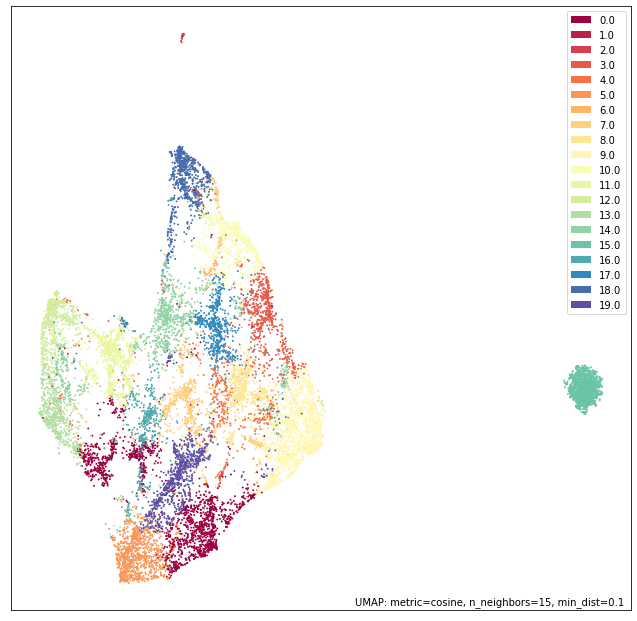

In [60]:
import umap
import umap.plot
mapper_lda = umap.UMAP(metric='cosine').fit(doc_vec)
umap.plot.points(mapper_lda, labels=np.array(df_dominant_topic.Dominant_Topic))

hover_data = pd.DataFrame({'index': np.arange(1, ndocs+1),
                           'label': [doc_set[i] for i in range(ndocs)],
                           'topic': df_dominant_topic.Dominant_Topic})
#p = umap.plot.interactive(mapper, labels=id_docs_nonvides, hover_data=hover_data, point_size=2)
#p = umap.plot.interactive(mapper_lda, hover_data=hover_data, point_size=2)
p = umap.plot.interactive(mapper_lda, labels=df_dominant_topic.Dominant_Topic, hover_data=hover_data, point_size=2)
umap.plot.show(p)

In [61]:
topic_tohide = [1, 5, 6, 9, 19]

doc_filtered = [id_doc for id_doc in range(ndocs) if len(corpus[id_doc])>2 and df_dominant_topic.Dominant_Topic[id_doc] not in topic_tohide]

len(doc_filtered)

10057

In [62]:
mapper_lda_small = umap.UMAP(metric='cosine').fit(doc_vec[doc_filtered])

hover_data = pd.DataFrame({'index': [i+1 for i in doc_filtered],
                           'label': [doc_set[i] for i in doc_filtered],
                           'topic': [df_dominant_topic.Dominant_Topic[i] for i in doc_filtered]})
p = umap.plot.interactive(mapper_lda_small, labels=[df_dominant_topic.Dominant_Topic[i] for i in doc_filtered], hover_data=hover_data, point_size=2)
umap.plot.show(p)